# WGAN-GP Training

## imports

In [1]:
%matplotlib inline

import os, shutil
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders_a import load_celeb
from utils.custom_utils import timer

import pickle


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeba_200k' #'celeb' ***на 1 уровень выше 
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

    
DS_path = 's:\_ML\Datasets'    

mode =  'load' #'build' #'load' #

## data

In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [4]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE, DS_path)

Found 202560 images belonging to 1 classes.


In [5]:
x_train[0][0][0]

array([[[-0.45882353, -0.92156863, -0.90588236],
        [-0.60784316, -0.99215686, -0.94509804],
        [-0.49803922, -1.        , -0.9607843 ],
        ...,
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-1.        , -1.        , -1.        ]],

       [[-0.4509804 , -0.9372549 , -0.92941177],
        [-0.60784316, -0.9607843 , -0.92156863],
        [-0.5372549 , -1.        , -0.94509804],
        ...,
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.9843137 , -0.9843137 , -0.9843137 ]],

       [[-0.4117647 , -0.92156863, -0.9372549 ],
        [-0.6156863 , -0.9372549 , -0.8901961 ],
        [-0.5921569 , -0.99215686, -0.9372549 ],
        ...,
        [-0.99215686, -0.99215686, -0.99215686],
        [-0.9843137 , -0.9843137 , -0.9843137 ],
        [-0.9843137 , -0.9843137 , -0.9843137 ]],

       ...,

       [[-0.24705882, -0.5764706 , -0.7490196 ],
        [ 0

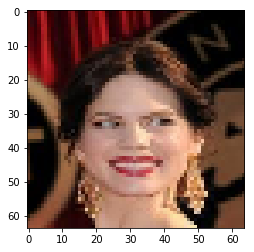

In [6]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [7]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    #gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights_.h5'))
    print("wights loaded: ", os.path.join(RUN_FOLDER, 'weights/weights_'))


wights loaded:  run/gan/0003_celeba_200k\weights/weights_


In [8]:
gan.critic.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                 

In [9]:
gan.generator.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)        

## training

In [10]:
EPOCHS = 5000 #6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

In [11]:
gan.train = timer(gan.train)  # timer decorator start


gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

W0308 12:54:11.704962 13992 training_v1.py:1982] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
W0308 12:54:17.124887 13992 training_v1.py:1982] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
W0308 12:54:18.113753 13992 deprecation.py:323] From c:\toolkits\anaconda3\envs\gen_gpu\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2070: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


0 (5, 1) [D loss: (-21.3)(R 88.4, F -113.9, G 0.4)] [G loss: 113.7]
1 (5, 1) [D loss: (-18.2)(R 67.4, F -90.4, G 0.5)] [G loss: 96.1]
2 (5, 1) [D loss: (-18.7)(R 75.9, F -99.2, G 0.5)] [G loss: 94.0]
3 (5, 1) [D loss: (-13.0)(R 70.9, F -87.9, G 0.4)] [G loss: 94.4]
4 (5, 1) [D loss: (-16.2)(R 66.4, F -86.4, G 0.4)] [G loss: 87.8]
5 (5, 1) [D loss: (-18.0)(R 52.9, F -75.5, G 0.5)] [G loss: 86.1]
6 (5, 1) [D loss: (-17.8)(R 84.0, F -109.3, G 0.8)] [G loss: 124.0]
7 (5, 1) [D loss: (-27.6)(R 90.5, F -126.7, G 0.9)] [G loss: 142.7]
8 (5, 1) [D loss: (-24.6)(R 73.0, F -102.8, G 0.5)] [G loss: 104.2]
9 (5, 1) [D loss: (-20.5)(R 79.2, F -106.8, G 0.7)] [G loss: 106.7]
10 (5, 1) [D loss: (-14.6)(R 73.3, F -94.2, G 0.6)] [G loss: 86.1]
11 (5, 1) [D loss: (-16.5)(R 64.0, F -84.2, G 0.4)] [G loss: 79.0]
12 (5, 1) [D loss: (-24.6)(R 60.8, F -91.4, G 0.6)] [G loss: 85.1]
13 (5, 1) [D loss: (-23.1)(R 67.7, F -97.4, G 0.7)] [G loss: 87.4]
14 (5, 1) [D loss: (-46.3)(R 77.8, F -132.4, G 0.8)] [G loss: 

120 (5, 1) [D loss: (-32.4)(R 9.7, F -57.6, G 1.6)] [G loss: -1.1]
121 (5, 1) [D loss: (-14.1)(R 21.2, F -50.0, G 1.5)] [G loss: 14.2]
122 (5, 1) [D loss: (-33.9)(R -5.9, F -41.3, G 1.3)] [G loss: -21.9]
123 (5, 1) [D loss: (-31.7)(R -37.5, F -4.9, G 1.1)] [G loss: -36.8]
124 (5, 1) [D loss: (-28.2)(R -8.1, F -25.7, G 0.6)] [G loss: 7.5]
125 (5, 1) [D loss: (-28.3)(R -50.7, F 10.5, G 1.2)] [G loss: -11.3]
126 (5, 1) [D loss: (-17.4)(R -25.2, F -1.9, G 1.0)] [G loss: 32.1]
127 (5, 1) [D loss: (-26.1)(R -6.7, F -27.5, G 0.8)] [G loss: 31.0]
128 (5, 1) [D loss: (-21.9)(R -21.0, F -11.2, G 1.0)] [G loss: 32.3]
129 (5, 1) [D loss: (-24.2)(R 1.2, F -30.6, G 0.5)] [G loss: 37.3]
130 (5, 1) [D loss: (-19.0)(R -26.2, F 0.4, G 0.7)] [G loss: 14.6]
131 (5, 1) [D loss: (-17.3)(R 7.0, F -30.1, G 0.6)] [G loss: 5.3]
132 (5, 1) [D loss: (-18.2)(R -19.0, F -5.4, G 0.6)] [G loss: 1.0]
133 (5, 1) [D loss: (-23.0)(R -16.5, F -11.6, G 0.5)] [G loss: 12.8]
134 (5, 1) [D loss: (-24.8)(R -37.5, F 5.9, G 0.7)

240 (5, 1) [D loss: (-17.7)(R 50.3, F -73.9, G 0.6)] [G loss: 58.5]
241 (5, 1) [D loss: (-19.1)(R 43.9, F -68.4, G 0.5)] [G loss: 64.3]
242 (5, 1) [D loss: (-20.1)(R 42.4, F -67.7, G 0.5)] [G loss: 61.5]
243 (5, 1) [D loss: (-20.4)(R 29.8, F -58.3, G 0.8)] [G loss: 68.4]
244 (5, 1) [D loss: (-24.6)(R 27.1, F -57.8, G 0.6)] [G loss: 66.8]
245 (5, 1) [D loss: (-19.3)(R 25.6, F -50.5, G 0.6)] [G loss: 51.3]
246 (5, 1) [D loss: (-20.7)(R 13.3, F -40.8, G 0.7)] [G loss: 43.4]
247 (5, 1) [D loss: (-15.4)(R 7.0, F -27.0, G 0.5)] [G loss: 27.5]
248 (5, 1) [D loss: (-19.2)(R 3.5, F -27.2, G 0.5)] [G loss: 23.3]
249 (5, 1) [D loss: (-18.4)(R 10.5, F -33.3, G 0.4)] [G loss: 33.4]
250 (5, 1) [D loss: (-18.2)(R 3.5, F -25.5, G 0.4)] [G loss: 19.9]
251 (5, 1) [D loss: (-16.1)(R 5.9, F -25.9, G 0.4)] [G loss: 20.0]
252 (5, 1) [D loss: (-17.3)(R 4.5, F -25.7, G 0.4)] [G loss: 25.7]
253 (5, 1) [D loss: (-19.4)(R 10.1, F -33.4, G 0.4)] [G loss: 40.7]
254 (5, 1) [D loss: (-14.9)(R -5.6, F -17.3, G 0.8)] 

361 (5, 1) [D loss: (-10.5)(R 32.7, F -46.8, G 0.4)] [G loss: 44.9]
362 (5, 1) [D loss: (-11.4)(R 24.4, F -39.1, G 0.3)] [G loss: 39.1]
363 (5, 1) [D loss: (-20.1)(R 37.1, F -60.7, G 0.4)] [G loss: 57.5]
364 (5, 1) [D loss: (-18.6)(R 39.9, F -62.0, G 0.3)] [G loss: 61.4]
365 (5, 1) [D loss: (-27.1)(R 60.8, F -93.6, G 0.6)] [G loss: 73.8]
366 (5, 1) [D loss: (-11.1)(R 72.7, F -89.6, G 0.6)] [G loss: 71.5]
367 (5, 1) [D loss: (-12.4)(R 53.9, F -70.2, G 0.4)] [G loss: 59.3]
368 (5, 1) [D loss: (-22.2)(R 34.3, F -61.0, G 0.4)] [G loss: 45.6]
369 (5, 1) [D loss: (-13.2)(R 58.2, F -76.8, G 0.5)] [G loss: 60.6]
370 (5, 1) [D loss: (-15.3)(R 45.2, F -65.2, G 0.5)] [G loss: 49.2]
371 (5, 1) [D loss: (-18.5)(R 26.8, F -49.1, G 0.4)] [G loss: 37.5]
372 (5, 1) [D loss: (-23.8)(R 24.2, F -52.0, G 0.4)] [G loss: 32.1]
373 (5, 1) [D loss: (-3.8)(R 49.9, F -59.1, G 0.5)] [G loss: 50.8]
374 (5, 1) [D loss: (-21.8)(R 33.9, F -58.6, G 0.3)] [G loss: 43.0]
375 (5, 1) [D loss: (-18.6)(R 39.9, F -61.9, G 0.

479 (5, 1) [D loss: (-17.5)(R 77.8, F -99.3, G 0.4)] [G loss: 97.0]
480 (5, 1) [D loss: (-20.0)(R 69.7, F -94.2, G 0.4)] [G loss: 105.0]
481 (5, 1) [D loss: (-7.6)(R 85.4, F -97.8, G 0.5)] [G loss: 96.3]
482 (5, 1) [D loss: (-18.7)(R 54.3, F -76.6, G 0.4)] [G loss: 87.3]
483 (5, 1) [D loss: (-21.1)(R 60.3, F -90.8, G 0.9)] [G loss: 116.4]
484 (5, 1) [D loss: (-17.8)(R 66.9, F -91.3, G 0.7)] [G loss: 101.0]
485 (5, 1) [D loss: (-25.2)(R 61.9, F -92.1, G 0.5)] [G loss: 106.0]
486 (5, 1) [D loss: (-15.5)(R 73.7, F -97.1, G 0.8)] [G loss: 102.4]
487 (5, 1) [D loss: (-16.9)(R 73.7, F -95.8, G 0.5)] [G loss: 95.5]
488 (5, 1) [D loss: (-28.2)(R 86.2, F -125.6, G 1.1)] [G loss: 133.3]
489 (5, 1) [D loss: (-28.2)(R 96.5, F -135.3, G 1.1)] [G loss: 131.8]
490 (5, 1) [D loss: (-39.5)(R 108.4, F -167.9, G 2.0)] [G loss: 133.6]
491 (5, 1) [D loss: (-53.4)(R 86.2, F -153.3, G 1.4)] [G loss: 119.6]
492 (5, 1) [D loss: (-47.0)(R 58.2, F -114.1, G 0.9)] [G loss: 91.4]
493 (5, 1) [D loss: (-35.5)(R 80.7

597 (5, 1) [D loss: (-42.1)(R 115.3, F -173.4, G 1.6)] [G loss: 142.6]
598 (5, 1) [D loss: (-26.8)(R 89.1, F -123.3, G 0.7)] [G loss: 112.0]
599 (5, 1) [D loss: (-43.3)(R 82.1, F -137.9, G 1.3)] [G loss: 93.1]
600 (5, 1) [D loss: (-24.1)(R 106.6, F -143.1, G 1.2)] [G loss: 91.6]
601 (5, 1) [D loss: (-31.6)(R 96.8, F -142.3, G 1.4)] [G loss: 88.0]
602 (5, 1) [D loss: (-28.4)(R 96.7, F -143.1, G 1.8)] [G loss: 80.2]
603 (5, 1) [D loss: (-35.5)(R 82.5, F -133.2, G 1.5)] [G loss: 52.3]
604 (5, 1) [D loss: (-36.8)(R 73.9, F -118.9, G 0.8)] [G loss: 71.6]
605 (5, 1) [D loss: (-32.8)(R 71.3, F -111.3, G 0.7)] [G loss: 63.2]
606 (5, 1) [D loss: (-20.3)(R 81.2, F -108.0, G 0.7)] [G loss: 60.6]
607 (5, 1) [D loss: (-24.3)(R 73.1, F -103.1, G 0.6)] [G loss: 67.2]
608 (5, 1) [D loss: (-19.2)(R 56.1, F -80.5, G 0.5)] [G loss: 55.3]
609 (5, 1) [D loss: (-14.4)(R 56.3, F -74.9, G 0.4)] [G loss: 55.9]
610 (5, 1) [D loss: (-17.8)(R 48.1, F -69.1, G 0.3)] [G loss: 52.9]
611 (5, 1) [D loss: (-15.3)(R 22.

714 (5, 1) [D loss: (-33.6)(R 105.0, F -147.3, G 0.9)] [G loss: 121.0]
715 (5, 1) [D loss: (-21.6)(R 89.5, F -117.1, G 0.6)] [G loss: 98.2]
716 (5, 1) [D loss: (-24.7)(R 88.6, F -119.5, G 0.6)] [G loss: 94.8]
717 (5, 1) [D loss: (-28.7)(R 93.0, F -132.6, G 1.1)] [G loss: 97.6]
718 (5, 1) [D loss: (-14.7)(R 73.7, F -92.5, G 0.4)] [G loss: 76.0]
719 (5, 1) [D loss: (-22.8)(R 62.6, F -90.9, G 0.6)] [G loss: 67.9]
720 (5, 1) [D loss: (-24.0)(R 68.3, F -97.9, G 0.6)] [G loss: 75.0]
721 (5, 1) [D loss: (-19.0)(R 55.9, F -80.6, G 0.6)] [G loss: 63.2]
722 (5, 1) [D loss: (-18.7)(R 31.9, F -54.4, G 0.4)] [G loss: 53.2]
723 (5, 1) [D loss: (-14.6)(R 37.9, F -57.6, G 0.5)] [G loss: 49.2]
724 (5, 1) [D loss: (-16.1)(R 38.5, F -59.4, G 0.5)] [G loss: 50.0]
725 (5, 1) [D loss: (-14.3)(R 25.6, F -42.6, G 0.3)] [G loss: 41.1]
726 (5, 1) [D loss: (-14.2)(R 25.4, F -42.3, G 0.3)] [G loss: 45.6]
727 (5, 1) [D loss: (-11.2)(R 24.5, F -39.4, G 0.4)] [G loss: 31.2]
728 (5, 1) [D loss: (-11.5)(R 23.7, F -38.

834 (5, 1) [D loss: (-20.5)(R 86.4, F -112.3, G 0.5)] [G loss: 84.2]
835 (5, 1) [D loss: (-24.0)(R 74.4, F -105.7, G 0.7)] [G loss: 73.9]
836 (5, 1) [D loss: (-18.6)(R 72.5, F -99.8, G 0.9)] [G loss: 76.6]
837 (5, 1) [D loss: (-24.5)(R 75.8, F -108.6, G 0.8)] [G loss: 81.3]
838 (5, 1) [D loss: (-18.7)(R 87.3, F -116.2, G 1.0)] [G loss: 82.3]
839 (5, 1) [D loss: (-27.4)(R 61.8, F -95.3, G 0.6)] [G loss: 61.1]
840 (5, 1) [D loss: (-16.6)(R 57.6, F -79.8, G 0.6)] [G loss: 59.9]
841 (5, 1) [D loss: (-18.7)(R 43.8, F -66.0, G 0.4)] [G loss: 59.3]
842 (5, 1) [D loss: (-14.8)(R 40.0, F -57.8, G 0.3)] [G loss: 58.6]
843 (5, 1) [D loss: (-10.9)(R 27.4, F -42.7, G 0.4)] [G loss: 51.9]
844 (5, 1) [D loss: (-15.3)(R 22.3, F -41.8, G 0.4)] [G loss: 51.0]
845 (5, 1) [D loss: (-13.6)(R 29.9, F -47.0, G 0.3)] [G loss: 57.7]
846 (5, 1) [D loss: (-15.1)(R 21.0, F -38.9, G 0.3)] [G loss: 37.1]
847 (5, 1) [D loss: (-14.3)(R 15.0, F -32.9, G 0.4)] [G loss: 28.1]
848 (5, 1) [D loss: (-5.0)(R 18.6, F -27.2, 

954 (5, 1) [D loss: (-16.7)(R 35.1, F -55.9, G 0.4)] [G loss: 45.7]
955 (5, 1) [D loss: (-15.8)(R 32.2, F -53.4, G 0.5)] [G loss: 39.4]
956 (5, 1) [D loss: (-14.1)(R 43.1, F -60.8, G 0.4)] [G loss: 54.5]
957 (5, 1) [D loss: (-13.5)(R 34.9, F -52.4, G 0.4)] [G loss: 55.7]
958 (5, 1) [D loss: (-14.2)(R 40.9, F -59.5, G 0.4)] [G loss: 72.9]
959 (5, 1) [D loss: (-19.8)(R 52.0, F -76.7, G 0.5)] [G loss: 93.7]
960 (5, 1) [D loss: (-19.4)(R 56.9, F -81.8, G 0.5)] [G loss: 94.7]
961 (5, 1) [D loss: (-21.9)(R 73.6, F -101.6, G 0.6)] [G loss: 119.0]
962 (5, 1) [D loss: (-21.4)(R 64.0, F -89.6, G 0.4)] [G loss: 107.7]
963 (5, 1) [D loss: (-16.3)(R 67.3, F -86.9, G 0.3)] [G loss: 88.0]
964 (5, 1) [D loss: (-16.3)(R 107.8, F -131.6, G 0.8)] [G loss: 139.6]
965 (5, 1) [D loss: (-27.6)(R 127.9, F -167.8, G 1.2)] [G loss: 189.4]
966 (5, 1) [D loss: (-10.3)(R 179.4, F -206.4, G 1.7)] [G loss: 190.8]
967 (5, 1) [D loss: (-18.2)(R 141.1, F -169.0, G 1.0)] [G loss: 167.3]
968 (5, 1) [D loss: (-22.4)(R 164

1072 (5, 1) [D loss: (-25.5)(R 122.3, F -153.1, G 0.5)] [G loss: 163.5]
1073 (5, 1) [D loss: (-26.2)(R 170.2, F -209.1, G 1.3)] [G loss: 220.5]
1074 (5, 1) [D loss: (-40.4)(R 141.6, F -188.7, G 0.7)] [G loss: 208.3]
1075 (5, 1) [D loss: (-37.3)(R 169.5, F -215.5, G 0.9)] [G loss: 215.8]
1076 (5, 1) [D loss: (-39.3)(R 169.6, F -214.2, G 0.5)] [G loss: 209.3]
1077 (5, 1) [D loss: (-21.5)(R 155.8, F -181.1, G 0.4)] [G loss: 155.8]
1078 (5, 1) [D loss: (-25.5)(R 139.4, F -171.3, G 0.6)] [G loss: 166.8]
1079 (5, 1) [D loss: (-30.3)(R 117.3, F -152.3, G 0.5)] [G loss: 150.7]
1080 (5, 1) [D loss: (-13.5)(R 129.2, F -146.5, G 0.4)] [G loss: 121.0]
1081 (5, 1) [D loss: (-23.1)(R 108.5, F -135.2, G 0.4)] [G loss: 122.1]
1082 (5, 1) [D loss: (-15.3)(R 130.1, F -151.7, G 0.6)] [G loss: 132.7]
1083 (5, 1) [D loss: (-22.6)(R 131.6, F -160.6, G 0.6)] [G loss: 144.6]
1084 (5, 1) [D loss: (-25.5)(R 145.0, F -177.2, G 0.7)] [G loss: 127.2]
1085 (5, 1) [D loss: (-18.2)(R 126.6, F -149.4, G 0.5)] [G loss:

1188 (5, 1) [D loss: (-31.3)(R 114.4, F -151.8, G 0.6)] [G loss: 135.5]
1189 (5, 1) [D loss: (-31.0)(R 136.3, F -176.5, G 0.9)] [G loss: 153.5]
1190 (5, 1) [D loss: (-43.0)(R 129.1, F -180.0, G 0.8)] [G loss: 160.2]
1191 (5, 1) [D loss: (-34.8)(R 108.2, F -146.0, G 0.3)] [G loss: 130.9]
1192 (5, 1) [D loss: (-10.8)(R 136.0, F -153.6, G 0.7)] [G loss: 131.1]
1193 (5, 1) [D loss: (-23.5)(R 132.8, F -163.0, G 0.7)] [G loss: 132.6]
1194 (5, 1) [D loss: (-19.3)(R 109.0, F -132.1, G 0.4)] [G loss: 112.4]
1195 (5, 1) [D loss: (-19.2)(R 106.5, F -128.7, G 0.3)] [G loss: 107.7]
1196 (5, 1) [D loss: (-14.7)(R 92.6, F -110.6, G 0.3)] [G loss: 100.8]
1197 (5, 1) [D loss: (-11.6)(R 104.6, F -119.9, G 0.4)] [G loss: 104.4]
1198 (5, 1) [D loss: (-17.0)(R 88.4, F -108.9, G 0.3)] [G loss: 99.7]
1199 (5, 1) [D loss: (-16.9)(R 81.7, F -101.2, G 0.3)] [G loss: 99.7]
1200 (5, 1) [D loss: (-15.5)(R 89.8, F -108.2, G 0.3)] [G loss: 107.8]
1201 (5, 1) [D loss: (-17.4)(R 97.7, F -119.1, G 0.4)] [G loss: 114.7]

1305 (5, 1) [D loss: (-14.1)(R 83.1, F -99.4, G 0.2)] [G loss: 88.1]
1306 (5, 1) [D loss: (-18.0)(R 67.7, F -88.7, G 0.3)] [G loss: 82.4]
1307 (5, 1) [D loss: (-19.9)(R 68.6, F -92.5, G 0.4)] [G loss: 84.5]
1308 (5, 1) [D loss: (-17.4)(R 108.4, F -133.3, G 0.7)] [G loss: 118.3]
1309 (5, 1) [D loss: (8.5)(R 127.4, F -126.9, G 0.8)] [G loss: 92.9]
1310 (5, 1) [D loss: (-21.1)(R 90.5, F -117.3, G 0.6)] [G loss: 86.4]
1311 (5, 1) [D loss: (-20.1)(R 92.5, F -116.9, G 0.4)] [G loss: 84.6]
1312 (5, 1) [D loss: (-12.2)(R 72.0, F -86.9, G 0.3)] [G loss: 76.0]
1313 (5, 1) [D loss: (-13.8)(R 81.1, F -98.2, G 0.3)] [G loss: 87.1]
1314 (5, 1) [D loss: (-15.7)(R 82.8, F -101.6, G 0.3)] [G loss: 94.9]
1315 (5, 1) [D loss: (-17.4)(R 80.5, F -101.3, G 0.3)] [G loss: 98.5]
1316 (5, 1) [D loss: (-11.9)(R 84.6, F -99.1, G 0.3)] [G loss: 95.2]
1317 (5, 1) [D loss: (-16.2)(R 77.4, F -96.2, G 0.3)] [G loss: 95.0]
1318 (5, 1) [D loss: (-7.3)(R 86.1, F -96.6, G 0.3)] [G loss: 96.7]
1319 (5, 1) [D loss: (-16.7)

1423 (5, 1) [D loss: (-17.5)(R 68.3, F -88.7, G 0.3)] [G loss: 84.4]
1424 (5, 1) [D loss: (-13.0)(R 64.0, F -79.3, G 0.2)] [G loss: 80.0]
1425 (5, 1) [D loss: (-12.5)(R 70.4, F -85.7, G 0.3)] [G loss: 88.7]
1426 (5, 1) [D loss: (-8.7)(R 75.1, F -86.5, G 0.3)] [G loss: 88.5]
1427 (5, 1) [D loss: (-10.3)(R 66.9, F -81.0, G 0.4)] [G loss: 87.9]
1428 (5, 1) [D loss: (-10.3)(R 71.9, F -85.8, G 0.4)] [G loss: 87.7]
1429 (5, 1) [D loss: (-15.4)(R 73.2, F -90.9, G 0.2)] [G loss: 97.5]
1430 (5, 1) [D loss: (-13.3)(R 72.7, F -88.5, G 0.3)] [G loss: 84.9]
1431 (5, 1) [D loss: (-14.8)(R 72.4, F -89.9, G 0.3)] [G loss: 84.3]
1432 (5, 1) [D loss: (-10.5)(R 67.1, F -79.8, G 0.2)] [G loss: 78.3]
1433 (5, 1) [D loss: (-12.8)(R 62.2, F -77.9, G 0.3)] [G loss: 83.0]
1434 (5, 1) [D loss: (-13.9)(R 69.8, F -86.0, G 0.2)] [G loss: 86.1]
1435 (5, 1) [D loss: (-11.1)(R 72.2, F -86.0, G 0.3)] [G loss: 93.7]
1436 (5, 1) [D loss: (-19.3)(R 77.7, F -100.8, G 0.4)] [G loss: 109.6]
1437 (5, 1) [D loss: (-14.5)(R 70

1542 (5, 1) [D loss: (-9.3)(R 77.1, F -90.2, G 0.4)] [G loss: 83.2]
1543 (5, 1) [D loss: (-8.0)(R 68.3, F -78.9, G 0.3)] [G loss: 78.5]
1544 (5, 1) [D loss: (-14.9)(R 62.3, F -80.3, G 0.3)] [G loss: 80.4]
1545 (5, 1) [D loss: (-9.6)(R 70.2, F -83.0, G 0.3)] [G loss: 81.0]
1546 (5, 1) [D loss: (-10.6)(R 63.6, F -76.4, G 0.2)] [G loss: 77.0]
1547 (5, 1) [D loss: (-15.0)(R 58.6, F -76.4, G 0.3)] [G loss: 74.3]
1548 (5, 1) [D loss: (-15.4)(R 55.1, F -73.8, G 0.3)] [G loss: 70.4]
1549 (5, 1) [D loss: (-14.7)(R 48.1, F -65.4, G 0.3)] [G loss: 65.0]
1550 (5, 1) [D loss: (-14.4)(R 58.8, F -76.0, G 0.3)] [G loss: 75.4]
1551 (5, 1) [D loss: (-15.6)(R 60.5, F -79.1, G 0.3)] [G loss: 78.7]
1552 (5, 1) [D loss: (-12.9)(R 57.9, F -73.7, G 0.3)] [G loss: 75.9]
1553 (5, 1) [D loss: (-14.3)(R 63.0, F -80.6, G 0.3)] [G loss: 79.9]
1554 (5, 1) [D loss: (-13.4)(R 60.7, F -76.7, G 0.3)] [G loss: 76.5]
1555 (5, 1) [D loss: (-11.9)(R 61.8, F -76.9, G 0.3)] [G loss: 77.2]
1556 (5, 1) [D loss: (-12.8)(R 51.9, 

1661 (5, 1) [D loss: (-17.4)(R 53.0, F -74.1, G 0.4)] [G loss: 65.0]
1662 (5, 1) [D loss: (-14.0)(R 56.0, F -72.5, G 0.2)] [G loss: 66.7]
1663 (5, 1) [D loss: (-13.2)(R 44.6, F -60.5, G 0.3)] [G loss: 58.3]
1664 (5, 1) [D loss: (-13.8)(R 37.7, F -54.1, G 0.3)] [G loss: 55.6]
1665 (5, 1) [D loss: (-15.8)(R 61.7, F -80.5, G 0.3)] [G loss: 83.3]
1666 (5, 1) [D loss: (-17.1)(R 54.3, F -75.3, G 0.4)] [G loss: 80.8]
1667 (5, 1) [D loss: (-14.8)(R 64.3, F -82.8, G 0.4)] [G loss: 83.2]
1668 (5, 1) [D loss: (-17.3)(R 70.2, F -91.5, G 0.4)] [G loss: 89.8]
1669 (5, 1) [D loss: (-17.3)(R 84.8, F -105.9, G 0.4)] [G loss: 100.5]
1670 (5, 1) [D loss: (-11.3)(R 79.7, F -94.9, G 0.4)] [G loss: 93.8]
1671 (5, 1) [D loss: (-18.2)(R 66.7, F -88.0, G 0.3)] [G loss: 80.6]
1672 (5, 1) [D loss: (-16.1)(R 67.5, F -86.6, G 0.3)] [G loss: 83.8]
1673 (5, 1) [D loss: (-9.0)(R 71.4, F -84.4, G 0.4)] [G loss: 86.2]
1674 (5, 1) [D loss: (-22.3)(R 77.2, F -103.0, G 0.4)] [G loss: 102.4]
1675 (5, 1) [D loss: (-23.4)(R 

1779 (5, 1) [D loss: (-13.1)(R 45.7, F -61.3, G 0.3)] [G loss: 61.7]
1780 (5, 1) [D loss: (-10.6)(R 53.0, F -66.1, G 0.3)] [G loss: 66.6]
1781 (5, 1) [D loss: (-8.3)(R 66.5, F -77.4, G 0.3)] [G loss: 75.2]
1782 (5, 1) [D loss: (-13.5)(R 52.9, F -69.1, G 0.3)] [G loss: 67.6]
1783 (5, 1) [D loss: (-14.6)(R 55.9, F -73.1, G 0.3)] [G loss: 73.4]
1784 (5, 1) [D loss: (-12.2)(R 57.3, F -71.7, G 0.2)] [G loss: 69.7]
1785 (5, 1) [D loss: (-9.2)(R 49.1, F -61.5, G 0.3)] [G loss: 70.0]
1786 (5, 1) [D loss: (-15.1)(R 53.2, F -70.6, G 0.2)] [G loss: 68.7]
1787 (5, 1) [D loss: (-11.0)(R 67.1, F -80.9, G 0.3)] [G loss: 83.5]
1788 (5, 1) [D loss: (-8.7)(R 63.7, F -75.8, G 0.3)] [G loss: 79.1]
1789 (5, 1) [D loss: (-11.2)(R 59.4, F -74.0, G 0.3)] [G loss: 75.0]
1790 (5, 1) [D loss: (-6.5)(R 65.7, F -74.9, G 0.3)] [G loss: 71.8]
1791 (5, 1) [D loss: (-12.5)(R 54.3, F -69.0, G 0.2)] [G loss: 66.6]
1792 (5, 1) [D loss: (-13.5)(R 57.2, F -74.0, G 0.3)] [G loss: 71.2]
1793 (5, 1) [D loss: (-10.8)(R 58.8, F

1898 (5, 1) [D loss: (-18.2)(R 61.0, F -82.0, G 0.3)] [G loss: 73.9]
1899 (5, 1) [D loss: (-11.9)(R 60.7, F -75.2, G 0.3)] [G loss: 70.8]
1900 (5, 1) [D loss: (-14.8)(R 60.4, F -78.2, G 0.3)] [G loss: 66.0]
1901 (5, 1) [D loss: (-12.3)(R 51.4, F -65.9, G 0.2)] [G loss: 60.6]
1902 (5, 1) [D loss: (-22.1)(R 59.5, F -85.4, G 0.4)] [G loss: 76.7]
1903 (5, 1) [D loss: (-6.3)(R 50.1, F -58.5, G 0.2)] [G loss: 48.0]
1904 (5, 1) [D loss: (-10.8)(R 36.6, F -49.5, G 0.2)] [G loss: 46.8]
1905 (5, 1) [D loss: (-10.4)(R 36.1, F -48.9, G 0.2)] [G loss: 43.9]
1906 (5, 1) [D loss: (-12.8)(R 27.2, F -42.3, G 0.2)] [G loss: 38.7]
1907 (5, 1) [D loss: (-12.5)(R 29.3, F -44.4, G 0.3)] [G loss: 45.7]
1908 (5, 1) [D loss: (-9.3)(R 37.1, F -48.8, G 0.3)] [G loss: 50.2]
1909 (5, 1) [D loss: (-12.2)(R 34.9, F -49.6, G 0.3)] [G loss: 52.9]
1910 (5, 1) [D loss: (-10.1)(R 44.0, F -56.0, G 0.2)] [G loss: 52.6]
1911 (5, 1) [D loss: (-12.1)(R 41.7, F -55.8, G 0.2)] [G loss: 51.5]
1912 (5, 1) [D loss: (-14.1)(R 45.3,

2015 (5, 1) [D loss: (-20.4)(R 92.0, F -116.2, G 0.4)] [G loss: 96.8]
2016 (5, 1) [D loss: (-43.5)(R 86.0, F -136.0, G 0.6)] [G loss: 98.3]
2017 (5, 1) [D loss: (-26.5)(R 97.5, F -130.1, G 0.6)] [G loss: 102.1]
2018 (5, 1) [D loss: (-30.2)(R 82.9, F -118.6, G 0.5)] [G loss: 81.2]
2019 (5, 1) [D loss: (-18.6)(R 80.4, F -102.4, G 0.3)] [G loss: 71.9]
2020 (5, 1) [D loss: (-19.6)(R 73.7, F -96.6, G 0.3)] [G loss: 64.7]
2021 (5, 1) [D loss: (-17.6)(R 65.8, F -87.4, G 0.4)] [G loss: 63.0]
2022 (5, 1) [D loss: (-13.4)(R 59.9, F -75.7, G 0.2)] [G loss: 62.8]
2023 (5, 1) [D loss: (-14.7)(R 52.9, F -70.6, G 0.3)] [G loss: 76.7]
2024 (5, 1) [D loss: (-15.2)(R 64.0, F -82.1, G 0.3)] [G loss: 93.2]
2025 (5, 1) [D loss: (-22.9)(R 70.2, F -97.2, G 0.4)] [G loss: 117.4]
2026 (5, 1) [D loss: (-21.9)(R 77.7, F -103.0, G 0.3)] [G loss: 126.7]
2027 (5, 1) [D loss: (-9.1)(R 113.8, F -127.1, G 0.4)] [G loss: 132.0]
2028 (5, 1) [D loss: (-12.4)(R 78.0, F -93.8, G 0.3)] [G loss: 109.9]
2029 (5, 1) [D loss: (

2133 (5, 1) [D loss: (-19.6)(R 70.2, F -93.6, G 0.4)] [G loss: 91.2]
2134 (5, 1) [D loss: (-19.9)(R 65.4, F -88.2, G 0.3)] [G loss: 81.0]
2135 (5, 1) [D loss: (-11.3)(R 78.8, F -94.2, G 0.4)] [G loss: 81.7]
2136 (5, 1) [D loss: (-22.0)(R 60.5, F -86.0, G 0.3)] [G loss: 80.8]
2137 (5, 1) [D loss: (-28.8)(R 71.3, F -105.1, G 0.5)] [G loss: 86.7]
2138 (5, 1) [D loss: (-25.0)(R 67.4, F -94.4, G 0.2)] [G loss: 78.9]
2139 (5, 1) [D loss: (-8.5)(R 86.2, F -98.1, G 0.3)] [G loss: 85.1]
2140 (5, 1) [D loss: (-22.3)(R 84.1, F -111.3, G 0.5)] [G loss: 93.0]
2141 (5, 1) [D loss: (-18.3)(R 94.6, F -116.8, G 0.4)] [G loss: 91.5]
2142 (5, 1) [D loss: (-22.4)(R 76.8, F -103.1, G 0.4)] [G loss: 75.1]
2143 (5, 1) [D loss: (-12.6)(R 82.9, F -98.8, G 0.3)] [G loss: 77.4]
2144 (5, 1) [D loss: (-3.7)(R 84.0, F -91.7, G 0.4)] [G loss: 77.8]
2145 (5, 1) [D loss: (-15.0)(R 47.1, F -65.1, G 0.3)] [G loss: 63.5]
2146 (5, 1) [D loss: (-19.3)(R 64.8, F -87.2, G 0.3)] [G loss: 78.1]
2147 (5, 1) [D loss: (-18.3)(R 6

2251 (5, 1) [D loss: (-12.5)(R 56.4, F -71.0, G 0.2)] [G loss: 72.5]
2252 (5, 1) [D loss: (-13.4)(R 56.6, F -72.1, G 0.2)] [G loss: 69.3]
2253 (5, 1) [D loss: (-11.6)(R 55.2, F -69.4, G 0.3)] [G loss: 69.1]
2254 (5, 1) [D loss: (-11.7)(R 54.7, F -68.8, G 0.2)] [G loss: 70.0]
2255 (5, 1) [D loss: (-19.8)(R 46.5, F -69.7, G 0.3)] [G loss: 67.1]
2256 (5, 1) [D loss: (-11.4)(R 66.0, F -80.0, G 0.3)] [G loss: 78.0]
2257 (5, 1) [D loss: (-8.7)(R 61.7, F -72.8, G 0.2)] [G loss: 72.3]
2258 (5, 1) [D loss: (-11.8)(R 69.4, F -83.4, G 0.2)] [G loss: 83.1]
2259 (5, 1) [D loss: (-11.2)(R 60.9, F -74.1, G 0.2)] [G loss: 74.9]
2260 (5, 1) [D loss: (-9.4)(R 60.1, F -72.1, G 0.3)] [G loss: 69.1]
2261 (5, 1) [D loss: (-12.3)(R 58.9, F -73.0, G 0.2)] [G loss: 71.1]
2262 (5, 1) [D loss: (-11.7)(R 57.1, F -71.2, G 0.2)] [G loss: 71.0]
2263 (5, 1) [D loss: (-13.5)(R 56.7, F -72.1, G 0.2)] [G loss: 73.6]
2264 (5, 1) [D loss: (-12.4)(R 60.9, F -75.9, G 0.3)] [G loss: 75.5]
2265 (5, 1) [D loss: (-12.7)(R 59.9,

2370 (5, 1) [D loss: (-10.9)(R 50.5, F -64.3, G 0.3)] [G loss: 68.8]
2371 (5, 1) [D loss: (-13.7)(R 52.5, F -69.7, G 0.3)] [G loss: 67.6]
2372 (5, 1) [D loss: (-10.7)(R 60.7, F -75.2, G 0.4)] [G loss: 74.1]
2373 (5, 1) [D loss: (-11.1)(R 65.7, F -81.6, G 0.5)] [G loss: 69.0]
2374 (5, 1) [D loss: (-16.1)(R 50.1, F -68.7, G 0.2)] [G loss: 62.5]
2375 (5, 1) [D loss: (-11.2)(R 56.5, F -71.0, G 0.3)] [G loss: 70.2]
2376 (5, 1) [D loss: (-11.5)(R 55.1, F -69.6, G 0.3)] [G loss: 65.6]
2377 (5, 1) [D loss: (-16.0)(R 54.0, F -72.8, G 0.3)] [G loss: 71.5]
2378 (5, 1) [D loss: (-12.8)(R 63.5, F -78.4, G 0.2)] [G loss: 73.3]
2379 (5, 1) [D loss: (-14.3)(R 47.6, F -64.1, G 0.2)] [G loss: 59.6]
2380 (5, 1) [D loss: (-13.7)(R 52.5, F -68.4, G 0.2)] [G loss: 64.5]
2381 (5, 1) [D loss: (-8.3)(R 44.2, F -55.3, G 0.3)] [G loss: 58.5]
2382 (5, 1) [D loss: (-12.8)(R 39.8, F -55.7, G 0.3)] [G loss: 53.2]
2383 (5, 1) [D loss: (-11.7)(R 41.0, F -55.1, G 0.2)] [G loss: 51.1]
2384 (5, 1) [D loss: (-14.0)(R 30.9

2489 (5, 1) [D loss: (-8.1)(R 54.0, F -63.8, G 0.2)] [G loss: 64.5]
2490 (5, 1) [D loss: (-12.5)(R 54.0, F -68.5, G 0.2)] [G loss: 66.5]
2491 (5, 1) [D loss: (-10.6)(R 53.3, F -66.3, G 0.2)] [G loss: 62.5]
2492 (5, 1) [D loss: (-12.0)(R 57.9, F -72.1, G 0.2)] [G loss: 66.7]
2493 (5, 1) [D loss: (-12.4)(R 39.4, F -54.0, G 0.2)] [G loss: 49.2]
2494 (5, 1) [D loss: (-12.3)(R 42.6, F -57.1, G 0.2)] [G loss: 58.6]
2495 (5, 1) [D loss: (-10.7)(R 45.7, F -58.5, G 0.2)] [G loss: 53.8]
2496 (5, 1) [D loss: (-9.9)(R 33.1, F -45.5, G 0.2)] [G loss: 46.2]
2497 (5, 1) [D loss: (-13.0)(R 42.4, F -57.6, G 0.2)] [G loss: 57.1]
2498 (5, 1) [D loss: (-10.9)(R 35.6, F -48.6, G 0.2)] [G loss: 44.5]
2499 (5, 1) [D loss: (-11.3)(R 35.6, F -48.8, G 0.2)] [G loss: 50.1]
2500 (5, 1) [D loss: (-12.8)(R 34.2, F -49.1, G 0.2)] [G loss: 48.3]
2501 (5, 1) [D loss: (-12.9)(R 31.5, F -46.6, G 0.2)] [G loss: 49.2]
2502 (5, 1) [D loss: (-11.5)(R 37.4, F -50.9, G 0.2)] [G loss: 46.9]
2503 (5, 1) [D loss: (-11.5)(R 35.2,

2608 (5, 1) [D loss: (-11.4)(R 38.1, F -51.2, G 0.2)] [G loss: 52.4]
2609 (5, 1) [D loss: (-16.8)(R 27.8, F -47.6, G 0.3)] [G loss: 53.0]
2610 (5, 1) [D loss: (-11.0)(R 37.4, F -52.0, G 0.4)] [G loss: 58.6]
2611 (5, 1) [D loss: (-15.8)(R 45.0, F -63.4, G 0.3)] [G loss: 56.6]
2612 (5, 1) [D loss: (-15.7)(R 44.2, F -62.9, G 0.3)] [G loss: 61.9]
2613 (5, 1) [D loss: (-16.5)(R 35.7, F -57.1, G 0.5)] [G loss: 54.1]
2614 (5, 1) [D loss: (-15.9)(R 46.8, F -64.7, G 0.2)] [G loss: 52.6]
2615 (5, 1) [D loss: (-14.8)(R 38.2, F -55.2, G 0.2)] [G loss: 52.2]
2616 (5, 1) [D loss: (-21.6)(R 41.3, F -66.7, G 0.4)] [G loss: 57.3]
2617 (5, 1) [D loss: (-20.8)(R 45.8, F -68.5, G 0.2)] [G loss: 61.8]
2618 (5, 1) [D loss: (-9.9)(R 51.9, F -64.2, G 0.2)] [G loss: 55.1]
2619 (5, 1) [D loss: (-12.7)(R 54.6, F -69.0, G 0.2)] [G loss: 66.0]
2620 (5, 1) [D loss: (-15.7)(R 59.0, F -77.3, G 0.3)] [G loss: 70.9]
2621 (5, 1) [D loss: (-8.9)(R 60.0, F -72.2, G 0.3)] [G loss: 70.9]
2622 (5, 1) [D loss: (-12.6)(R 43.8,

2727 (5, 1) [D loss: (-11.0)(R 95.4, F -108.8, G 0.2)] [G loss: 92.1]
2728 (5, 1) [D loss: (-9.0)(R 73.1, F -84.1, G 0.2)] [G loss: 75.3]
2729 (5, 1) [D loss: (-10.8)(R 53.4, F -65.7, G 0.2)] [G loss: 66.2]
2730 (5, 1) [D loss: (-12.1)(R 49.2, F -63.6, G 0.2)] [G loss: 70.1]
2731 (5, 1) [D loss: (-12.5)(R 41.8, F -58.3, G 0.4)] [G loss: 69.3]
2732 (5, 1) [D loss: (-16.3)(R 50.1, F -69.6, G 0.3)] [G loss: 74.1]
2733 (5, 1) [D loss: (-14.0)(R 51.2, F -67.1, G 0.2)] [G loss: 67.1]
2734 (5, 1) [D loss: (-17.2)(R 41.6, F -62.6, G 0.4)] [G loss: 72.0]
2735 (5, 1) [D loss: (-22.0)(R 50.9, F -76.7, G 0.4)] [G loss: 79.9]
2736 (5, 1) [D loss: (-15.2)(R 58.7, F -80.0, G 0.6)] [G loss: 75.3]
2737 (5, 1) [D loss: (-21.2)(R 48.8, F -72.6, G 0.3)] [G loss: 72.4]
2738 (5, 1) [D loss: (-17.2)(R 59.8, F -79.8, G 0.3)] [G loss: 75.5]
2739 (5, 1) [D loss: (-9.6)(R 61.7, F -73.1, G 0.2)] [G loss: 68.1]
2740 (5, 1) [D loss: (-12.2)(R 49.3, F -63.7, G 0.2)] [G loss: 59.4]
2741 (5, 1) [D loss: (-12.6)(R 52.3

2845 (5, 1) [D loss: (-21.0)(R 86.0, F -110.2, G 0.3)] [G loss: 112.6]
2846 (5, 1) [D loss: (-14.1)(R 95.4, F -112.4, G 0.3)] [G loss: 109.9]
2847 (5, 1) [D loss: (-20.1)(R 96.0, F -121.3, G 0.5)] [G loss: 119.2]
2848 (5, 1) [D loss: (-19.7)(R 108.8, F -132.7, G 0.4)] [G loss: 117.1]
2849 (5, 1) [D loss: (-22.8)(R 92.6, F -119.0, G 0.4)] [G loss: 110.7]
2850 (5, 1) [D loss: (-30.6)(R 116.7, F -151.8, G 0.5)] [G loss: 125.5]
2851 (5, 1) [D loss: (-17.8)(R 106.4, F -129.9, G 0.6)] [G loss: 106.0]
2852 (5, 1) [D loss: (-9.8)(R 105.1, F -118.0, G 0.3)] [G loss: 99.3]
2853 (5, 1) [D loss: (-17.9)(R 86.6, F -107.3, G 0.3)] [G loss: 95.0]
2854 (5, 1) [D loss: (-9.6)(R 83.7, F -96.5, G 0.3)] [G loss: 90.9]
2855 (5, 1) [D loss: (-11.5)(R 79.8, F -93.8, G 0.2)] [G loss: 86.0]
2856 (5, 1) [D loss: (-13.1)(R 65.7, F -81.6, G 0.3)] [G loss: 85.0]
2857 (5, 1) [D loss: (-15.4)(R 61.0, F -79.6, G 0.3)] [G loss: 82.4]
2858 (5, 1) [D loss: (-14.5)(R 70.0, F -87.1, G 0.3)] [G loss: 92.5]
2859 (5, 1) [D l

2962 (5, 1) [D loss: (-23.4)(R 66.1, F -94.2, G 0.5)] [G loss: 73.8]
2963 (5, 1) [D loss: (-16.0)(R 56.6, F -76.7, G 0.4)] [G loss: 62.8]
2964 (5, 1) [D loss: (-13.1)(R 44.4, F -62.5, G 0.5)] [G loss: 62.3]
2965 (5, 1) [D loss: (-14.1)(R 42.9, F -61.5, G 0.4)] [G loss: 54.7]
2966 (5, 1) [D loss: (-18.6)(R 42.1, F -63.8, G 0.3)] [G loss: 64.7]
2967 (5, 1) [D loss: (-17.1)(R 39.9, F -60.3, G 0.3)] [G loss: 55.3]
2968 (5, 1) [D loss: (-11.7)(R 40.2, F -55.5, G 0.4)] [G loss: 58.1]
2969 (5, 1) [D loss: (-14.7)(R 39.1, F -56.7, G 0.3)] [G loss: 53.3]
2970 (5, 1) [D loss: (-9.2)(R 48.3, F -61.6, G 0.4)] [G loss: 62.2]
2971 (5, 1) [D loss: (-13.3)(R 42.6, F -58.7, G 0.3)] [G loss: 62.6]
2972 (5, 1) [D loss: (-15.5)(R 44.3, F -62.4, G 0.3)] [G loss: 63.9]
2973 (5, 1) [D loss: (-13.3)(R 53.5, F -69.3, G 0.2)] [G loss: 72.9]
2974 (5, 1) [D loss: (-13.7)(R 61.0, F -76.8, G 0.2)] [G loss: 70.5]
2975 (5, 1) [D loss: (-9.1)(R 66.6, F -79.1, G 0.3)] [G loss: 77.9]
2976 (5, 1) [D loss: (-12.7)(R 63.5,

3080 (5, 1) [D loss: (-20.0)(R 27.9, F -51.0, G 0.3)] [G loss: 39.4]
3081 (5, 1) [D loss: (-21.6)(R 43.5, F -67.6, G 0.3)] [G loss: 60.2]
3082 (5, 1) [D loss: (-9.2)(R 49.3, F -62.9, G 0.4)] [G loss: 46.8]
3083 (5, 1) [D loss: (-21.7)(R 41.4, F -65.5, G 0.2)] [G loss: 49.3]
3084 (5, 1) [D loss: (-16.2)(R 39.4, F -57.9, G 0.2)] [G loss: 45.6]
3085 (5, 1) [D loss: (-16.3)(R 51.4, F -70.7, G 0.3)] [G loss: 55.3]
3086 (5, 1) [D loss: (-11.7)(R 57.6, F -71.0, G 0.2)] [G loss: 61.1]
3087 (5, 1) [D loss: (-12.4)(R 49.7, F -64.1, G 0.2)] [G loss: 58.9]
3088 (5, 1) [D loss: (-11.3)(R 61.7, F -75.1, G 0.2)] [G loss: 72.7]
3089 (5, 1) [D loss: (-10.7)(R 74.0, F -87.7, G 0.3)] [G loss: 96.8]
3090 (5, 1) [D loss: (-11.7)(R 86.7, F -101.7, G 0.3)] [G loss: 107.9]
3091 (5, 1) [D loss: (-17.5)(R 84.5, F -104.5, G 0.3)] [G loss: 113.7]
3092 (5, 1) [D loss: (-13.8)(R 101.1, F -118.5, G 0.4)] [G loss: 131.2]
3093 (5, 1) [D loss: (-16.6)(R 105.4, F -125.1, G 0.3)] [G loss: 135.0]
3094 (5, 1) [D loss: (-14

3199 (5, 1) [D loss: (-10.6)(R 23.2, F -36.3, G 0.3)] [G loss: 38.8]
3200 (5, 1) [D loss: (-11.3)(R 27.0, F -40.2, G 0.2)] [G loss: 43.7]
3201 (5, 1) [D loss: (-11.5)(R 30.2, F -43.5, G 0.2)] [G loss: 42.6]
3202 (5, 1) [D loss: (-10.4)(R 28.7, F -40.8, G 0.2)] [G loss: 45.0]
3203 (5, 1) [D loss: (-12.5)(R 22.8, F -37.6, G 0.2)] [G loss: 37.6]
3204 (5, 1) [D loss: (-7.4)(R 37.1, F -46.2, G 0.2)] [G loss: 45.2]
3205 (5, 1) [D loss: (-10.4)(R 30.4, F -42.8, G 0.2)] [G loss: 43.7]
3206 (5, 1) [D loss: (-10.0)(R 31.6, F -43.1, G 0.1)] [G loss: 44.2]
3207 (5, 1) [D loss: (-10.0)(R 42.1, F -54.6, G 0.2)] [G loss: 52.7]
3208 (5, 1) [D loss: (-11.2)(R 31.9, F -45.1, G 0.2)] [G loss: 43.3]
3209 (5, 1) [D loss: (-13.4)(R 35.4, F -50.9, G 0.2)] [G loss: 51.4]
3210 (5, 1) [D loss: (-10.5)(R 33.0, F -45.6, G 0.2)] [G loss: 50.3]
3211 (5, 1) [D loss: (-11.5)(R 40.8, F -53.9, G 0.2)] [G loss: 53.5]
3212 (5, 1) [D loss: (-11.9)(R 42.3, F -56.2, G 0.2)] [G loss: 57.2]
3213 (5, 1) [D loss: (-10.7)(R 45.1

3318 (5, 1) [D loss: (-6.4)(R 42.1, F -50.6, G 0.2)] [G loss: 54.0]
3319 (5, 1) [D loss: (-10.4)(R 49.0, F -60.6, G 0.1)] [G loss: 61.1]
3320 (5, 1) [D loss: (-11.2)(R 50.8, F -63.6, G 0.2)] [G loss: 62.4]
3321 (5, 1) [D loss: (-10.4)(R 48.6, F -61.4, G 0.2)] [G loss: 65.1]
3322 (5, 1) [D loss: (-10.9)(R 40.8, F -53.8, G 0.2)] [G loss: 55.3]
3323 (5, 1) [D loss: (-10.9)(R 39.3, F -52.4, G 0.2)] [G loss: 57.7]
3324 (5, 1) [D loss: (-10.8)(R 42.0, F -54.6, G 0.2)] [G loss: 59.8]
3325 (5, 1) [D loss: (-7.1)(R 40.4, F -49.7, G 0.2)] [G loss: 51.0]
3326 (5, 1) [D loss: (-10.7)(R 47.6, F -60.1, G 0.2)] [G loss: 57.0]
3327 (5, 1) [D loss: (-12.3)(R 40.6, F -54.7, G 0.2)] [G loss: 55.1]
3328 (5, 1) [D loss: (-14.4)(R 36.3, F -52.8, G 0.2)] [G loss: 54.5]
3329 (5, 1) [D loss: (-10.8)(R 47.8, F -61.3, G 0.3)] [G loss: 65.2]
3330 (5, 1) [D loss: (-16.4)(R 50.5, F -70.3, G 0.3)] [G loss: 73.5]
3331 (5, 1) [D loss: (-14.7)(R 60.1, F -77.4, G 0.3)] [G loss: 72.5]
3332 (5, 1) [D loss: (-19.0)(R 54.1,

3437 (5, 1) [D loss: (-45.2)(R 183.3, F -245.4, G 1.7)] [G loss: 248.5]
3438 (5, 1) [D loss: (-50.8)(R 168.2, F -229.4, G 1.0)] [G loss: 275.0]
3439 (5, 1) [D loss: (-41.8)(R 220.3, F -288.1, G 2.6)] [G loss: 235.0]
3440 (5, 1) [D loss: (-60.7)(R 212.5, F -299.5, G 2.6)] [G loss: 265.7]
3441 (5, 1) [D loss: (-44.4)(R 180.3, F -233.2, G 0.9)] [G loss: 250.5]
3442 (5, 1) [D loss: (-51.4)(R 172.4, F -236.7, G 1.3)] [G loss: 219.5]
3443 (5, 1) [D loss: (-29.5)(R 183.8, F -227.4, G 1.4)] [G loss: 200.8]
3444 (5, 1) [D loss: (-44.7)(R 218.7, F -289.0, G 2.6)] [G loss: 228.5]
3445 (5, 1) [D loss: (-49.1)(R 245.0, F -324.9, G 3.1)] [G loss: 227.3]
3446 (5, 1) [D loss: (-39.6)(R 187.8, F -241.2, G 1.4)] [G loss: 200.2]
3447 (5, 1) [D loss: (-27.3)(R 200.1, F -246.4, G 1.9)] [G loss: 193.0]
3448 (5, 1) [D loss: (-27.5)(R 158.4, F -196.2, G 1.0)] [G loss: 175.2]
3449 (5, 1) [D loss: (-37.2)(R 150.5, F -196.2, G 0.8)] [G loss: 172.7]
3450 (5, 1) [D loss: (-27.7)(R 185.6, F -231.2, G 1.8)] [G loss:

3552 (5, 1) [D loss: (-16.1)(R 116.3, F -141.0, G 0.9)] [G loss: 153.1]
3553 (5, 1) [D loss: (-24.7)(R 111.8, F -142.5, G 0.6)] [G loss: 149.9]
3554 (5, 1) [D loss: (-26.6)(R 97.2, F -128.5, G 0.5)] [G loss: 143.4]
3555 (5, 1) [D loss: (-17.9)(R 82.0, F -107.2, G 0.7)] [G loss: 125.5]
3556 (5, 1) [D loss: (-23.1)(R 67.8, F -97.5, G 0.6)] [G loss: 101.1]
3557 (5, 1) [D loss: (-27.4)(R 45.7, F -83.7, G 1.1)] [G loss: 91.9]
3558 (5, 1) [D loss: (-31.3)(R 10.8, F -52.0, G 1.0)] [G loss: 65.7]
3559 (5, 1) [D loss: (-19.6)(R 18.2, F -49.9, G 1.2)] [G loss: 61.4]
3560 (5, 1) [D loss: (-25.4)(R 37.5, F -73.2, G 1.0)] [G loss: 65.2]
3561 (5, 1) [D loss: (-15.3)(R 16.3, F -40.8, G 0.9)] [G loss: 41.2]
3562 (5, 1) [D loss: (-27.4)(R 0.8, F -37.3, G 0.9)] [G loss: 29.7]
3563 (5, 1) [D loss: (-17.2)(R 61.7, F -82.6, G 0.4)] [G loss: 80.5]
3564 (5, 1) [D loss: (-17.5)(R 48.4, F -68.6, G 0.3)] [G loss: 76.0]
3565 (5, 1) [D loss: (-24.5)(R 73.0, F -100.5, G 0.3)] [G loss: 93.6]
3566 (5, 1) [D loss: (-

3671 (5, 1) [D loss: (-9.2)(R 31.2, F -42.3, G 0.2)] [G loss: 42.4]
3672 (5, 1) [D loss: (-10.0)(R 23.3, F -35.1, G 0.2)] [G loss: 39.1]
3673 (5, 1) [D loss: (-11.1)(R 32.1, F -44.9, G 0.2)] [G loss: 44.4]
3674 (5, 1) [D loss: (-11.7)(R 33.0, F -47.1, G 0.2)] [G loss: 46.3]
3675 (5, 1) [D loss: (-9.3)(R 32.7, F -43.8, G 0.2)] [G loss: 52.2]
3676 (5, 1) [D loss: (-13.2)(R 38.7, F -53.6, G 0.2)] [G loss: 55.4]
3677 (5, 1) [D loss: (-11.2)(R 44.4, F -57.5, G 0.2)] [G loss: 55.4]
3678 (5, 1) [D loss: (-11.3)(R 31.5, F -44.6, G 0.2)] [G loss: 42.4]
3679 (5, 1) [D loss: (-9.4)(R 37.8, F -49.3, G 0.2)] [G loss: 50.5]
3680 (5, 1) [D loss: (-8.6)(R 48.6, F -59.6, G 0.3)] [G loss: 58.3]
3681 (5, 1) [D loss: (-8.6)(R 53.5, F -64.3, G 0.2)] [G loss: 59.5]
3682 (5, 1) [D loss: (-12.5)(R 55.3, F -70.7, G 0.3)] [G loss: 74.8]
3683 (5, 1) [D loss: (-11.4)(R 51.9, F -65.6, G 0.2)] [G loss: 63.5]
3684 (5, 1) [D loss: (-11.0)(R 55.5, F -68.6, G 0.2)] [G loss: 65.5]
3685 (5, 1) [D loss: (-7.9)(R 58.9, F -

3791 (5, 1) [D loss: (-16.1)(R 28.1, F -48.7, G 0.5)] [G loss: 40.8]
3792 (5, 1) [D loss: (-16.5)(R 27.2, F -45.4, G 0.2)] [G loss: 43.4]
3793 (5, 1) [D loss: (-10.8)(R 23.7, F -38.3, G 0.4)] [G loss: 41.2]
3794 (5, 1) [D loss: (-14.5)(R 27.8, F -44.4, G 0.2)] [G loss: 43.3]
3795 (5, 1) [D loss: (-1.0)(R 31.8, F -36.6, G 0.4)] [G loss: 41.2]
3796 (5, 1) [D loss: (-18.0)(R 29.8, F -50.7, G 0.3)] [G loss: 36.5]
3797 (5, 1) [D loss: (-10.0)(R 31.7, F -43.1, G 0.1)] [G loss: 43.3]
3798 (5, 1) [D loss: (-11.4)(R 24.9, F -38.1, G 0.2)] [G loss: 35.1]
3799 (5, 1) [D loss: (-9.9)(R 20.5, F -32.4, G 0.2)] [G loss: 34.2]
3800 (5, 1) [D loss: (-9.3)(R 30.0, F -41.1, G 0.2)] [G loss: 38.1]
3801 (5, 1) [D loss: (-12.5)(R 22.4, F -36.7, G 0.2)] [G loss: 35.8]
3802 (5, 1) [D loss: (-9.9)(R 33.6, F -45.2, G 0.2)] [G loss: 45.8]
3803 (5, 1) [D loss: (-10.7)(R 39.4, F -51.8, G 0.2)] [G loss: 49.6]
3804 (5, 1) [D loss: (-8.9)(R 43.6, F -54.7, G 0.2)] [G loss: 55.9]
3805 (5, 1) [D loss: (-10.3)(R 37.1, F 

3911 (5, 1) [D loss: (-11.4)(R 40.9, F -54.0, G 0.2)] [G loss: 45.1]
3912 (5, 1) [D loss: (-12.0)(R 28.1, F -43.3, G 0.3)] [G loss: 37.4]
3913 (5, 1) [D loss: (-19.2)(R 24.8, F -47.5, G 0.3)] [G loss: 31.1]
3914 (5, 1) [D loss: (-13.9)(R 31.8, F -48.9, G 0.3)] [G loss: 44.8]
3915 (5, 1) [D loss: (-10.4)(R 36.9, F -49.4, G 0.2)] [G loss: 49.4]
3916 (5, 1) [D loss: (-9.8)(R 45.8, F -57.5, G 0.2)] [G loss: 60.6]
3917 (5, 1) [D loss: (-9.8)(R 57.0, F -68.5, G 0.2)] [G loss: 67.1]
3918 (5, 1) [D loss: (-10.6)(R 54.1, F -66.6, G 0.2)] [G loss: 70.9]
3919 (5, 1) [D loss: (-12.2)(R 50.0, F -64.1, G 0.2)] [G loss: 74.2]
3920 (5, 1) [D loss: (-9.2)(R 67.5, F -78.9, G 0.2)] [G loss: 78.2]
3921 (5, 1) [D loss: (-14.4)(R 61.7, F -78.5, G 0.2)] [G loss: 85.4]
3922 (5, 1) [D loss: (-17.0)(R 74.9, F -94.3, G 0.2)] [G loss: 105.3]
3923 (5, 1) [D loss: (-14.0)(R 123.2, F -145.6, G 0.8)] [G loss: 131.2]
3924 (5, 1) [D loss: (-13.4)(R 100.6, F -119.0, G 0.5)] [G loss: 119.3]
3925 (5, 1) [D loss: (-16.0)(R

4031 (5, 1) [D loss: (-11.9)(R 48.0, F -61.6, G 0.2)] [G loss: 59.3]
4032 (5, 1) [D loss: (-9.7)(R 39.9, F -51.6, G 0.2)] [G loss: 46.8]
4033 (5, 1) [D loss: (-10.2)(R 37.4, F -49.3, G 0.2)] [G loss: 49.5]
4034 (5, 1) [D loss: (-9.8)(R 31.5, F -43.1, G 0.2)] [G loss: 39.3]
4035 (5, 1) [D loss: (-9.7)(R 33.0, F -44.4, G 0.2)] [G loss: 43.6]
4036 (5, 1) [D loss: (-10.2)(R 35.5, F -47.8, G 0.2)] [G loss: 48.9]
4037 (5, 1) [D loss: (-11.1)(R 42.9, F -55.9, G 0.2)] [G loss: 58.4]
4038 (5, 1) [D loss: (-5.2)(R 73.7, F -82.6, G 0.4)] [G loss: 75.4]
4039 (5, 1) [D loss: (-15.1)(R 59.4, F -77.5, G 0.3)] [G loss: 77.6]
4040 (5, 1) [D loss: (-11.6)(R 60.2, F -73.8, G 0.2)] [G loss: 66.7]
4041 (5, 1) [D loss: (-15.5)(R 60.4, F -78.9, G 0.3)] [G loss: 74.9]
4042 (5, 1) [D loss: (-14.0)(R 49.2, F -65.8, G 0.3)] [G loss: 62.7]
4043 (5, 1) [D loss: (-15.4)(R 47.2, F -64.5, G 0.2)] [G loss: 57.6]
4044 (5, 1) [D loss: (-8.3)(R 49.5, F -59.2, G 0.1)] [G loss: 57.9]
4045 (5, 1) [D loss: (-8.8)(R 47.1, F -

4151 (5, 1) [D loss: (-11.0)(R 21.4, F -34.4, G 0.2)] [G loss: 36.7]
4152 (5, 1) [D loss: (-14.5)(R 16.8, F -34.6, G 0.3)] [G loss: 33.3]
4153 (5, 1) [D loss: (-8.8)(R 20.9, F -31.5, G 0.2)] [G loss: 30.1]
4154 (5, 1) [D loss: (-5.0)(R 26.9, F -35.2, G 0.3)] [G loss: 33.2]
4155 (5, 1) [D loss: (-11.8)(R 22.7, F -36.1, G 0.2)] [G loss: 33.4]
4156 (5, 1) [D loss: (-11.1)(R 24.7, F -37.4, G 0.2)] [G loss: 37.7]
4157 (5, 1) [D loss: (-8.5)(R 29.4, F -39.6, G 0.2)] [G loss: 39.1]
4158 (5, 1) [D loss: (-9.3)(R 22.8, F -34.6, G 0.3)] [G loss: 39.3]
4159 (5, 1) [D loss: (-9.0)(R 28.4, F -38.9, G 0.2)] [G loss: 41.4]
4160 (5, 1) [D loss: (-5.3)(R 30.5, F -37.6, G 0.2)] [G loss: 43.2]
4161 (5, 1) [D loss: (-9.0)(R 40.6, F -51.0, G 0.1)] [G loss: 45.8]
4162 (5, 1) [D loss: (-8.6)(R 27.5, F -37.5, G 0.1)] [G loss: 36.0]
4163 (5, 1) [D loss: (-11.2)(R 26.5, F -39.6, G 0.2)] [G loss: 36.5]
4164 (5, 1) [D loss: (-9.6)(R 24.4, F -35.3, G 0.1)] [G loss: 33.4]
4165 (5, 1) [D loss: (-10.4)(R 26.9, F -39.

4271 (5, 1) [D loss: (-9.6)(R 22.2, F -33.9, G 0.2)] [G loss: 37.1]
4272 (5, 1) [D loss: (-11.1)(R 37.6, F -50.3, G 0.2)] [G loss: 50.6]
4273 (5, 1) [D loss: (-10.3)(R 38.1, F -50.3, G 0.2)] [G loss: 50.7]
4274 (5, 1) [D loss: (-11.2)(R 43.9, F -56.9, G 0.2)] [G loss: 62.6]
4275 (5, 1) [D loss: (-8.1)(R 51.4, F -61.0, G 0.2)] [G loss: 61.0]
4276 (5, 1) [D loss: (-10.0)(R 48.7, F -60.9, G 0.2)] [G loss: 67.0]
4277 (5, 1) [D loss: (-13.3)(R 44.0, F -59.3, G 0.2)] [G loss: 60.5]
4278 (5, 1) [D loss: (-12.9)(R 44.0, F -58.7, G 0.2)] [G loss: 56.6]
4279 (5, 1) [D loss: (-7.8)(R 52.3, F -62.4, G 0.2)] [G loss: 59.1]
4280 (5, 1) [D loss: (-13.4)(R 40.8, F -56.2, G 0.2)] [G loss: 55.4]
4281 (5, 1) [D loss: (-8.8)(R 54.5, F -65.2, G 0.2)] [G loss: 62.8]
4282 (5, 1) [D loss: (-13.8)(R 56.1, F -72.3, G 0.2)] [G loss: 67.2]
4283 (5, 1) [D loss: (-14.9)(R 61.0, F -78.9, G 0.3)] [G loss: 75.2]
4284 (5, 1) [D loss: (-5.1)(R 70.9, F -79.2, G 0.3)] [G loss: 64.5]
4285 (5, 1) [D loss: (-17.2)(R 53.8, F 

4390 (5, 1) [D loss: (-9.9)(R 35.4, F -46.8, G 0.1)] [G loss: 48.1]
4391 (5, 1) [D loss: (-9.5)(R 34.4, F -45.7, G 0.2)] [G loss: 49.8]
4392 (5, 1) [D loss: (-9.7)(R 40.4, F -52.1, G 0.2)] [G loss: 53.7]
4393 (5, 1) [D loss: (-12.0)(R 37.4, F -51.1, G 0.2)] [G loss: 50.2]
4394 (5, 1) [D loss: (-8.9)(R 45.8, F -56.5, G 0.2)] [G loss: 55.7]
4395 (5, 1) [D loss: (-10.7)(R 38.9, F -51.4, G 0.2)] [G loss: 54.8]
4396 (5, 1) [D loss: (-10.7)(R 38.3, F -50.9, G 0.2)] [G loss: 53.1]
4397 (5, 1) [D loss: (-11.0)(R 46.0, F -58.5, G 0.2)] [G loss: 61.8]
4398 (5, 1) [D loss: (-8.5)(R 52.4, F -62.9, G 0.2)] [G loss: 58.3]
4399 (5, 1) [D loss: (-5.3)(R 64.8, F -72.1, G 0.2)] [G loss: 71.1]
4400 (5, 1) [D loss: (-11.6)(R 60.3, F -73.8, G 0.2)] [G loss: 76.5]
4401 (5, 1) [D loss: (-10.6)(R 61.5, F -74.2, G 0.2)] [G loss: 76.0]
4402 (5, 1) [D loss: (-11.7)(R 67.0, F -81.4, G 0.3)] [G loss: 84.5]
4403 (5, 1) [D loss: (-13.3)(R 68.7, F -84.3, G 0.2)] [G loss: 77.5]
4404 (5, 1) [D loss: (-12.1)(R 67.3, F -

4510 (5, 1) [D loss: (-11.8)(R 43.4, F -56.9, G 0.2)] [G loss: 61.1]
4511 (5, 1) [D loss: (-11.7)(R 45.4, F -59.5, G 0.2)] [G loss: 66.1]
4512 (5, 1) [D loss: (-12.6)(R 47.4, F -62.4, G 0.2)] [G loss: 63.9]
4513 (5, 1) [D loss: (-14.5)(R 46.5, F -64.6, G 0.4)] [G loss: 64.7]
4514 (5, 1) [D loss: (-13.0)(R 36.4, F -51.4, G 0.2)] [G loss: 55.1]
4515 (5, 1) [D loss: (-12.2)(R 37.5, F -51.5, G 0.2)] [G loss: 48.4]
4516 (5, 1) [D loss: (-14.5)(R 40.1, F -58.2, G 0.4)] [G loss: 53.6]
4517 (5, 1) [D loss: (-14.4)(R 37.0, F -54.5, G 0.3)] [G loss: 48.2]
4518 (5, 1) [D loss: (-11.2)(R 47.2, F -60.3, G 0.2)] [G loss: 46.8]
4519 (5, 1) [D loss: (0.0)(R 40.7, F -43.2, G 0.3)] [G loss: 34.6]
4520 (5, 1) [D loss: (-10.1)(R 29.0, F -41.9, G 0.3)] [G loss: 35.6]
4521 (5, 1) [D loss: (-12.3)(R 27.0, F -41.1, G 0.2)] [G loss: 33.7]
4522 (5, 1) [D loss: (-14.0)(R 30.3, F -46.1, G 0.2)] [G loss: 40.8]
4523 (5, 1) [D loss: (-12.4)(R 24.9, F -39.0, G 0.2)] [G loss: 37.8]
4524 (5, 1) [D loss: (-9.7)(R 31.3, 

4627 (5, 1) [D loss: (-18.9)(R 198.4, F -223.6, G 0.6)] [G loss: 185.7]
4628 (5, 1) [D loss: (-17.7)(R 170.7, F -197.2, G 0.9)] [G loss: 187.2]
4629 (5, 1) [D loss: (-16.5)(R 151.6, F -177.5, G 0.9)] [G loss: 197.9]
4630 (5, 1) [D loss: (-23.8)(R 145.9, F -176.7, G 0.7)] [G loss: 203.8]
4631 (5, 1) [D loss: (-26.9)(R 147.3, F -182.0, G 0.8)] [G loss: 210.7]
4632 (5, 1) [D loss: (-24.3)(R 148.8, F -179.2, G 0.6)] [G loss: 207.0]
4633 (5, 1) [D loss: (-44.0)(R 150.7, F -211.9, G 1.7)] [G loss: 240.8]
4634 (5, 1) [D loss: (-34.9)(R 138.9, F -183.0, G 0.9)] [G loss: 231.8]
4635 (5, 1) [D loss: (-32.7)(R 142.5, F -196.7, G 2.2)] [G loss: 225.4]
4636 (5, 1) [D loss: (-31.6)(R 153.0, F -197.3, G 1.3)] [G loss: 226.8]
4637 (5, 1) [D loss: (-26.1)(R 184.6, F -224.0, G 1.3)] [G loss: 204.6]
4638 (5, 1) [D loss: (-26.4)(R 194.9, F -235.0, G 1.4)] [G loss: 224.1]
4639 (5, 1) [D loss: (-29.0)(R 172.0, F -216.5, G 1.5)] [G loss: 199.5]
4640 (5, 1) [D loss: (-33.4)(R 168.7, F -215.3, G 1.3)] [G loss:

4745 (5, 1) [D loss: (-12.1)(R 52.5, F -66.4, G 0.2)] [G loss: 68.2]
4746 (5, 1) [D loss: (-10.6)(R 59.1, F -71.1, G 0.1)] [G loss: 68.8]
4747 (5, 1) [D loss: (-13.5)(R 52.8, F -68.6, G 0.2)] [G loss: 65.9]
4748 (5, 1) [D loss: (-13.3)(R 55.5, F -70.6, G 0.2)] [G loss: 59.5]
4749 (5, 1) [D loss: (-6.7)(R 53.0, F -61.3, G 0.2)] [G loss: 66.8]
4750 (5, 1) [D loss: (-10.7)(R 55.0, F -67.3, G 0.2)] [G loss: 71.8]
4751 (5, 1) [D loss: (-7.7)(R 53.8, F -63.5, G 0.2)] [G loss: 59.7]
4752 (5, 1) [D loss: (-8.6)(R 53.5, F -63.5, G 0.1)] [G loss: 56.1]
4753 (5, 1) [D loss: (-10.1)(R 48.6, F -60.6, G 0.2)] [G loss: 58.0]
4754 (5, 1) [D loss: (-9.8)(R 58.8, F -69.8, G 0.1)] [G loss: 65.1]
4755 (5, 1) [D loss: (-10.2)(R 57.8, F -70.0, G 0.2)] [G loss: 66.1]
4756 (5, 1) [D loss: (-9.5)(R 51.1, F -62.0, G 0.1)] [G loss: 58.7]
4757 (5, 1) [D loss: (-10.6)(R 43.4, F -55.6, G 0.2)] [G loss: 57.7]
4758 (5, 1) [D loss: (-10.9)(R 48.7, F -61.5, G 0.2)] [G loss: 58.0]
4759 (5, 1) [D loss: (-7.4)(R 53.2, F -

4865 (5, 1) [D loss: (-9.8)(R 33.6, F -45.7, G 0.2)] [G loss: 47.5]
4866 (5, 1) [D loss: (-14.6)(R 35.2, F -51.1, G 0.1)] [G loss: 44.8]
4867 (5, 1) [D loss: (-12.7)(R 27.0, F -41.6, G 0.2)] [G loss: 43.2]
4868 (5, 1) [D loss: (-15.8)(R 25.3, F -43.8, G 0.3)] [G loss: 39.7]
4869 (5, 1) [D loss: (-11.3)(R 31.6, F -45.8, G 0.3)] [G loss: 50.2]
4870 (5, 1) [D loss: (-17.9)(R 34.8, F -55.0, G 0.2)] [G loss: 43.5]
4871 (5, 1) [D loss: (-17.1)(R 37.6, F -56.9, G 0.2)] [G loss: 45.9]
4872 (5, 1) [D loss: (-14.2)(R 45.6, F -62.5, G 0.3)] [G loss: 52.3]
4873 (5, 1) [D loss: (-9.6)(R 36.2, F -48.3, G 0.3)] [G loss: 42.3]
4874 (5, 1) [D loss: (-7.1)(R 42.2, F -51.8, G 0.3)] [G loss: 47.5]
4875 (5, 1) [D loss: (-13.8)(R 27.4, F -43.3, G 0.2)] [G loss: 37.1]
4876 (5, 1) [D loss: (-17.0)(R 29.5, F -48.8, G 0.2)] [G loss: 45.4]
4877 (5, 1) [D loss: (-10.1)(R 40.4, F -52.1, G 0.2)] [G loss: 56.1]
4878 (5, 1) [D loss: (-10.0)(R 42.5, F -55.4, G 0.3)] [G loss: 51.7]
4879 (5, 1) [D loss: (-9.8)(R 44.7, F

4982 (5, 1) [D loss: (-18.9)(R 172.6, F -199.1, G 0.8)] [G loss: 173.5]
4983 (5, 1) [D loss: (-27.5)(R 142.2, F -173.5, G 0.4)] [G loss: 174.1]
4984 (5, 1) [D loss: (-9.2)(R 153.4, F -167.3, G 0.5)] [G loss: 149.2]
4985 (5, 1) [D loss: (-17.1)(R 141.3, F -161.9, G 0.3)] [G loss: 161.4]
4986 (5, 1) [D loss: (-2.4)(R 158.9, F -166.1, G 0.5)] [G loss: 150.2]
4987 (5, 1) [D loss: (-18.5)(R 159.9, F -183.0, G 0.5)] [G loss: 162.1]
4988 (5, 1) [D loss: (-18.6)(R 179.2, F -206.6, G 0.9)] [G loss: 178.8]
4989 (5, 1) [D loss: (-13.3)(R 159.4, F -174.8, G 0.2)] [G loss: 165.9]
4990 (5, 1) [D loss: (-7.6)(R 155.7, F -165.7, G 0.2)] [G loss: 157.1]
4991 (5, 1) [D loss: (-16.4)(R 153.4, F -173.1, G 0.3)] [G loss: 157.2]
4992 (5, 1) [D loss: (-4.6)(R 176.0, F -185.7, G 0.5)] [G loss: 158.9]
4993 (5, 1) [D loss: (-21.4)(R 136.0, F -160.1, G 0.3)] [G loss: 156.1]
4994 (5, 1) [D loss: (-19.5)(R 138.6, F -160.5, G 0.2)] [G loss: 160.2]
4995 (5, 1) [D loss: (-12.0)(R 157.3, F -174.1, G 0.5)] [G loss: 163

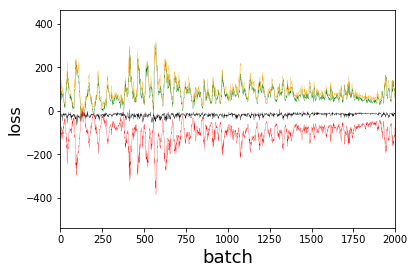

In [12]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()


In [13]:
# Copy weights
shutil.copy(os.path.join(RUN_FOLDER, 'weights\\weights.h5'), os.path.join(RUN_FOLDER, 'weights\\weights_.h5'))


'run/gan/0003_celeba_200k\\weights\\weights_.h5'

In [14]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

# GAN images

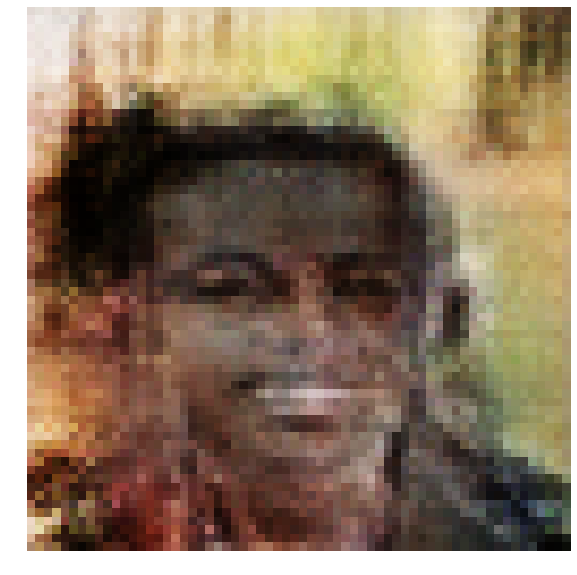

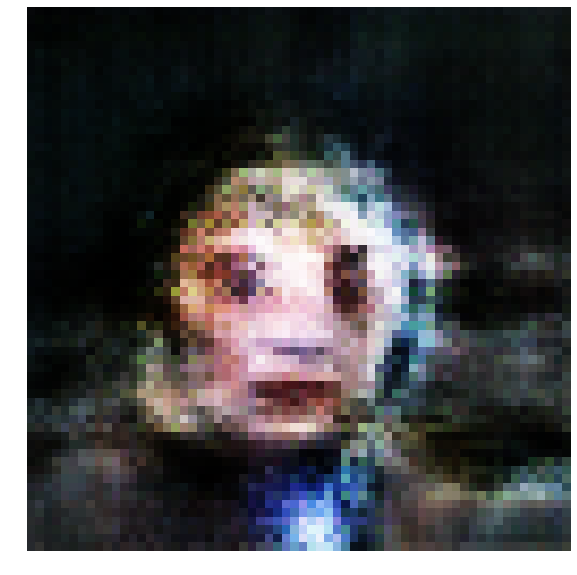

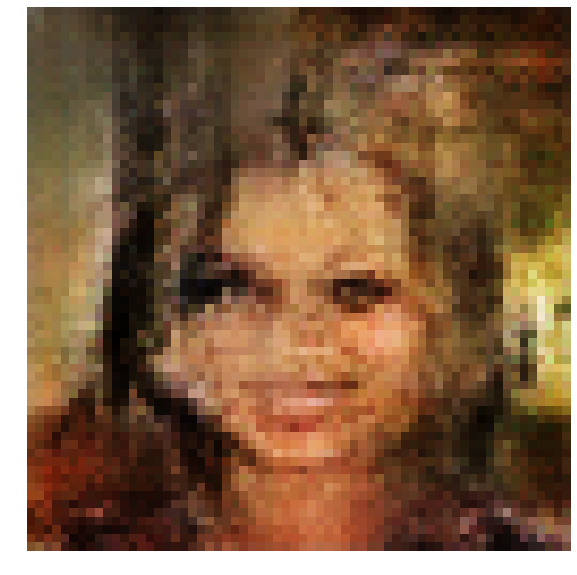

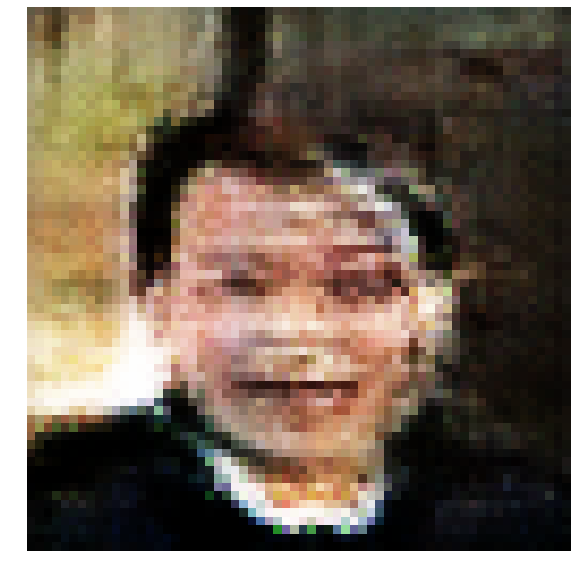

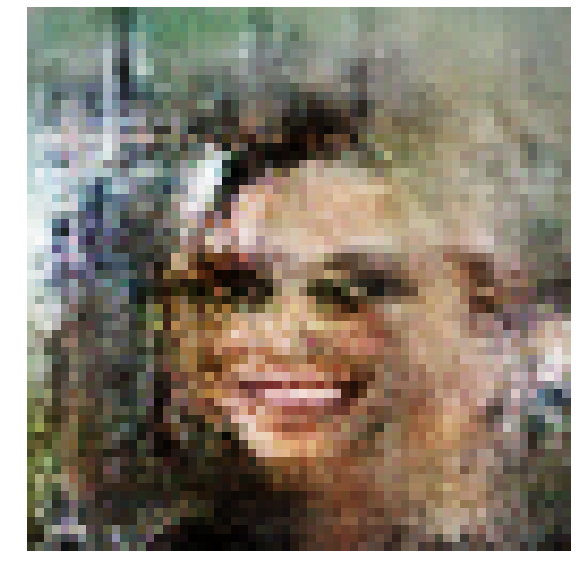

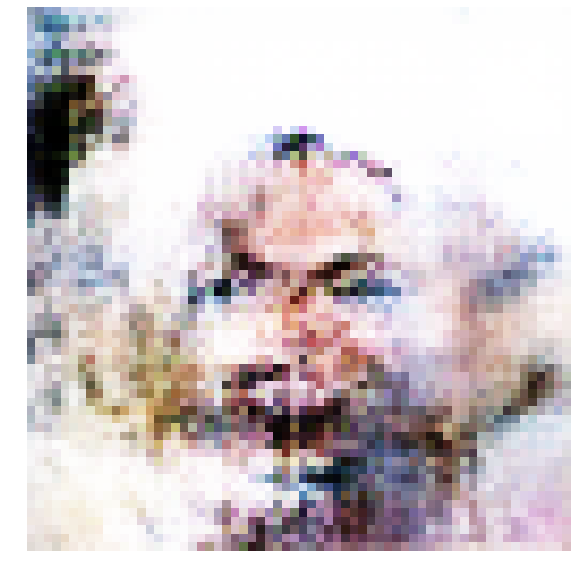

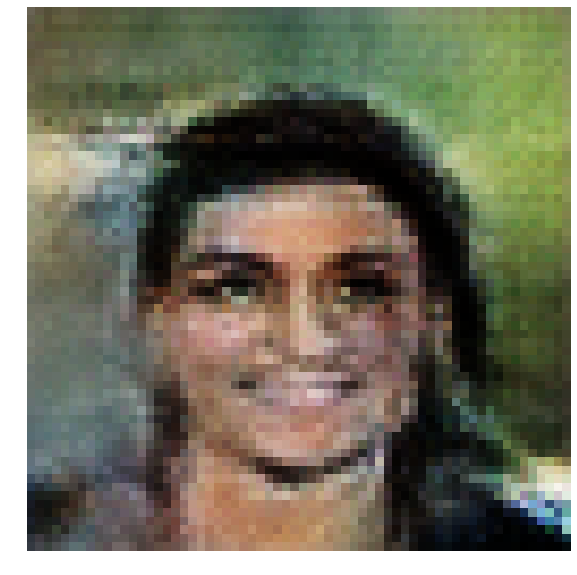

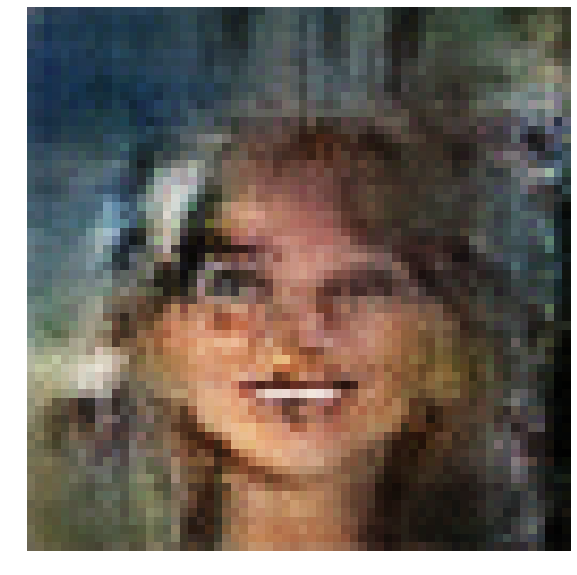

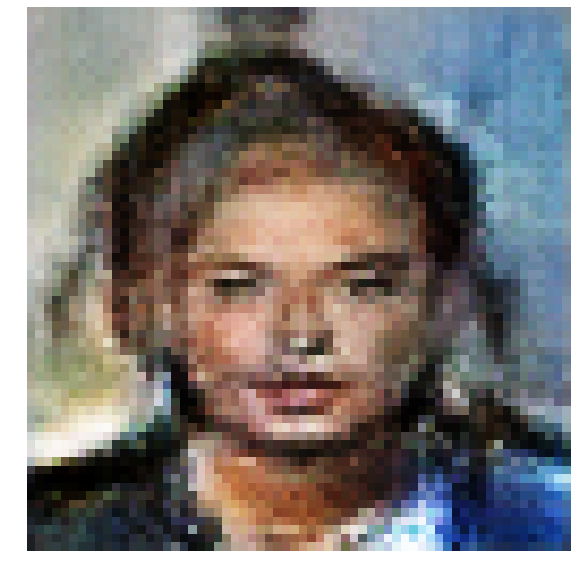

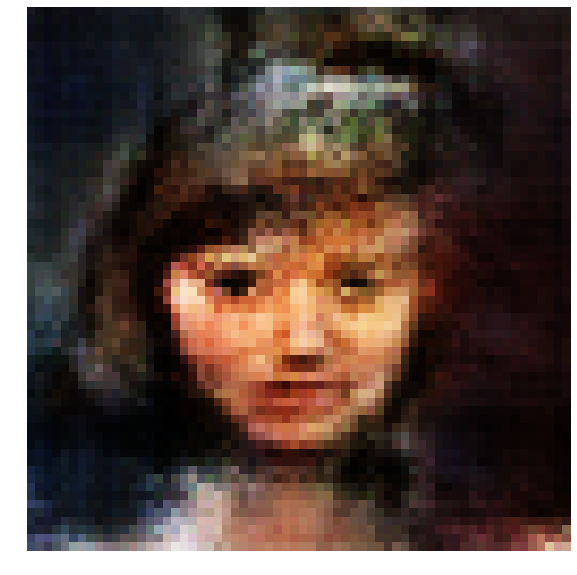

In [21]:
import numpy as np

for id in range(10):
    noise = np.random.normal(0, 1, (1, gan.z_dim))
    
    gen_imgs = gan.generator.predict(noise)
    gen_imgs = 0.5 * (gen_imgs + 1)
    gen_imgs = np.clip(gen_imgs, 0, 1)

    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(np.squeeze(gen_imgs[0, :,:,:]), cmap = 'gray_r')
    plt.savefig(os.path.join(RUN_FOLDER, "images/custom_%s.png" % id))

In [22]:
def sample_images_my(run_folder, r=2, c=2, id='0000'):
    """Save generated images
    (self, run_folder, r=5, c=5)
    r, c - plot matrix size
    """
    #r, c = self.plot_size[0], self.plot_size[1]
    noise = np.random.normal(0, 1, (r * c, gan.z_dim))
    gen_imgs = gan.generator.predict(noise)

    #Rescale images 0 - 1

    gen_imgs = 0.5 * (gen_imgs + 1)
    gen_imgs = np.clip(gen_imgs, 0, 1)

    fig, axs = plt.subplots(r, c, figsize=(30,30))
    cnt = 0

    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig(os.path.join(run_folder, "images/custom_%s.png" % id))
    plt.close()


In [26]:
sample_images_my(RUN_FOLDER, id='0005')

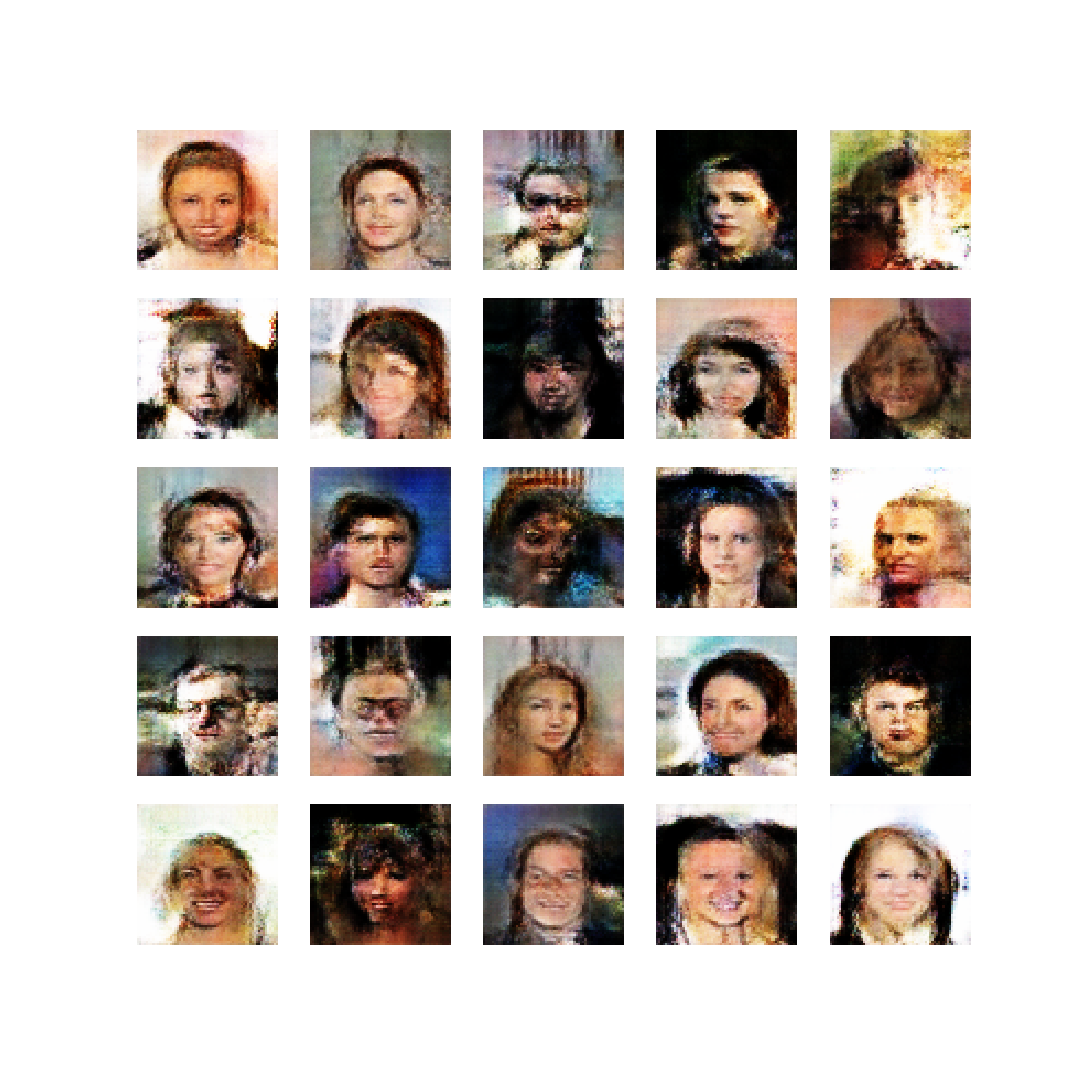

In [15]:
from IPython.display import Image
#3995
Image(filename = RUN_FOLDER + "/images/sample_3995.png", width=1080, height=1080)


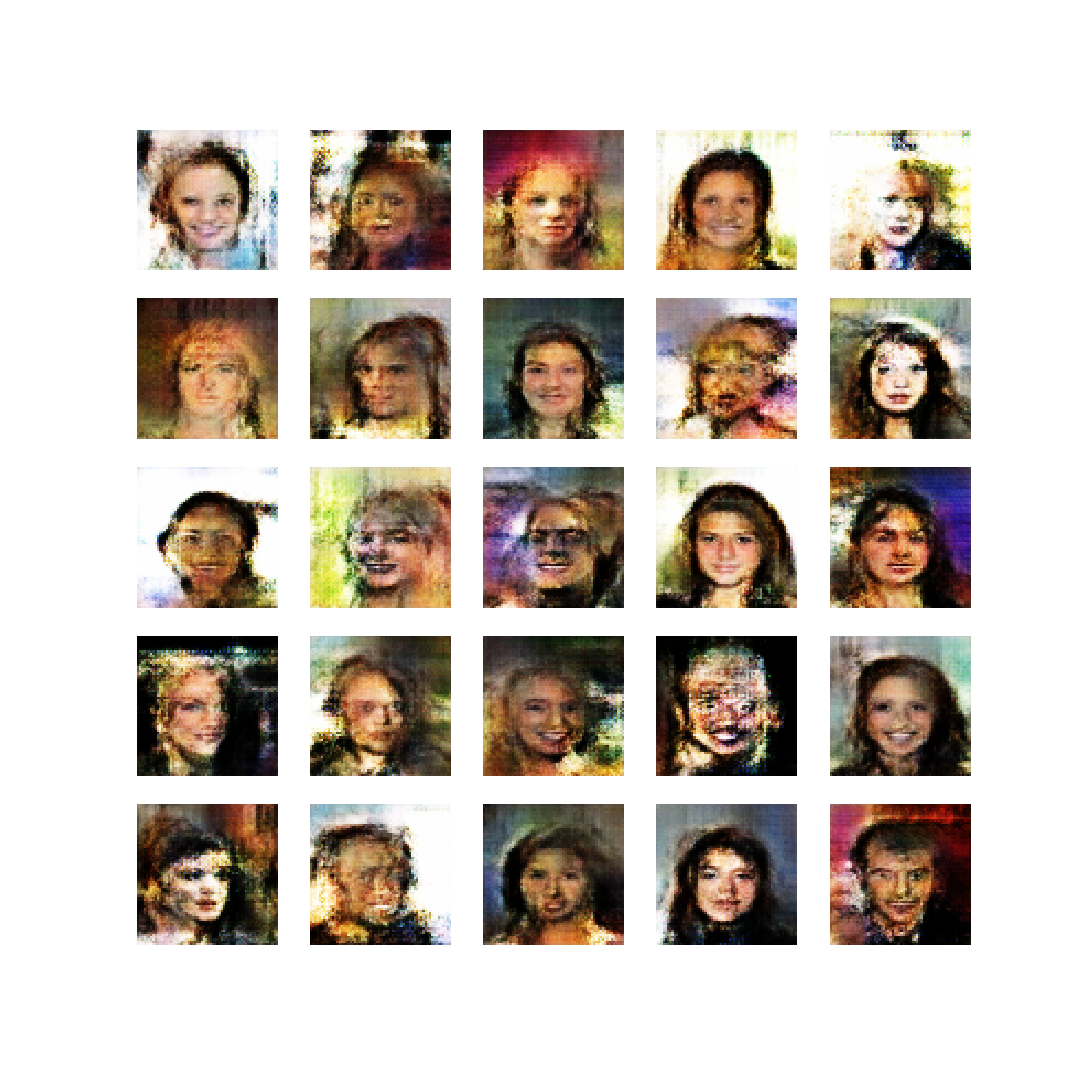

In [16]:
#3000
Image(filename = RUN_FOLDER + "/images/sample_3000.png", width=1080, height=1080)

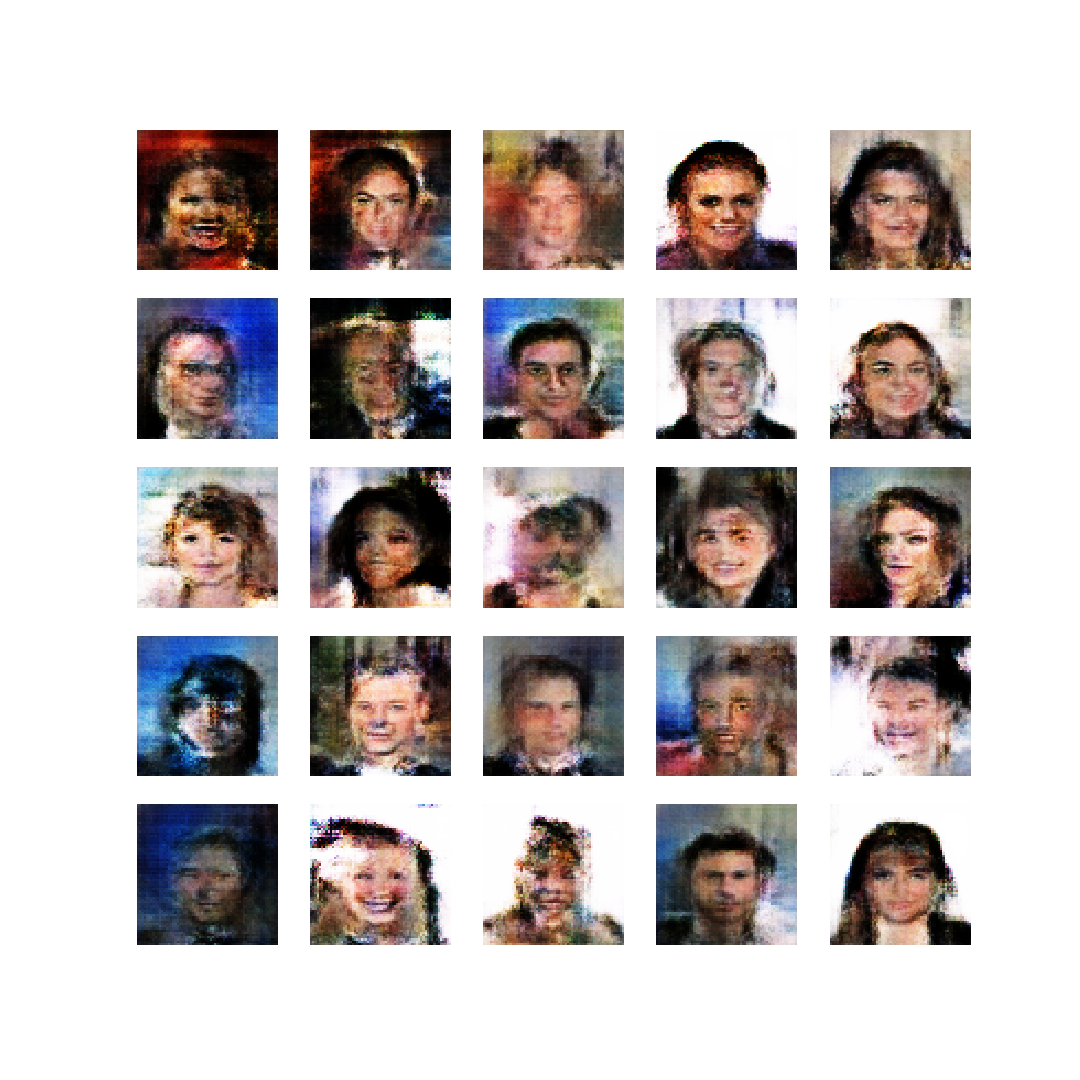

In [17]:
#2000
Image(filename = RUN_FOLDER + "/images/sample_2000.png", width=1080, height=1080)

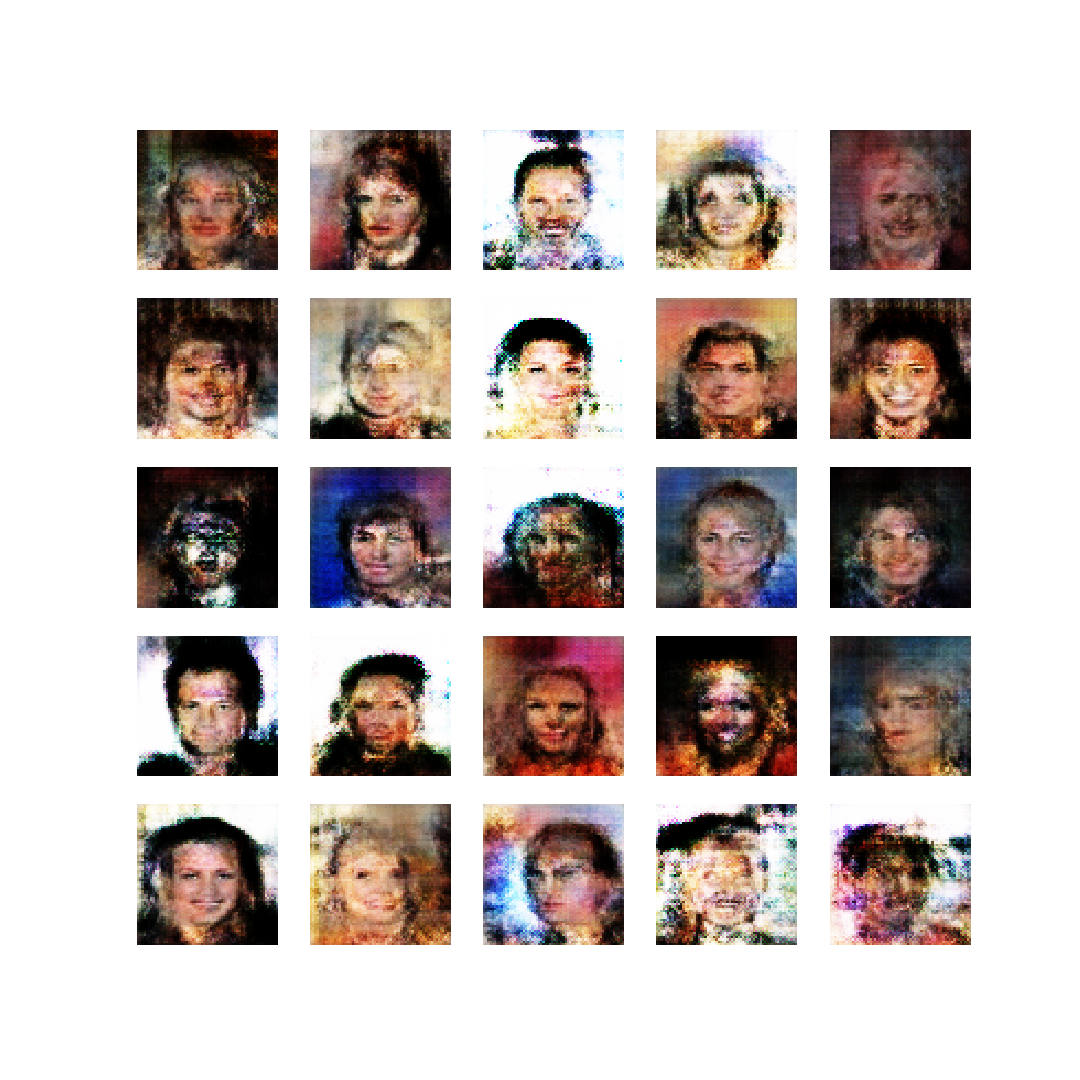

In [18]:
#1000
Image(filename = RUN_FOLDER + "/images/sample_1000.png", width=1080, height=1080)

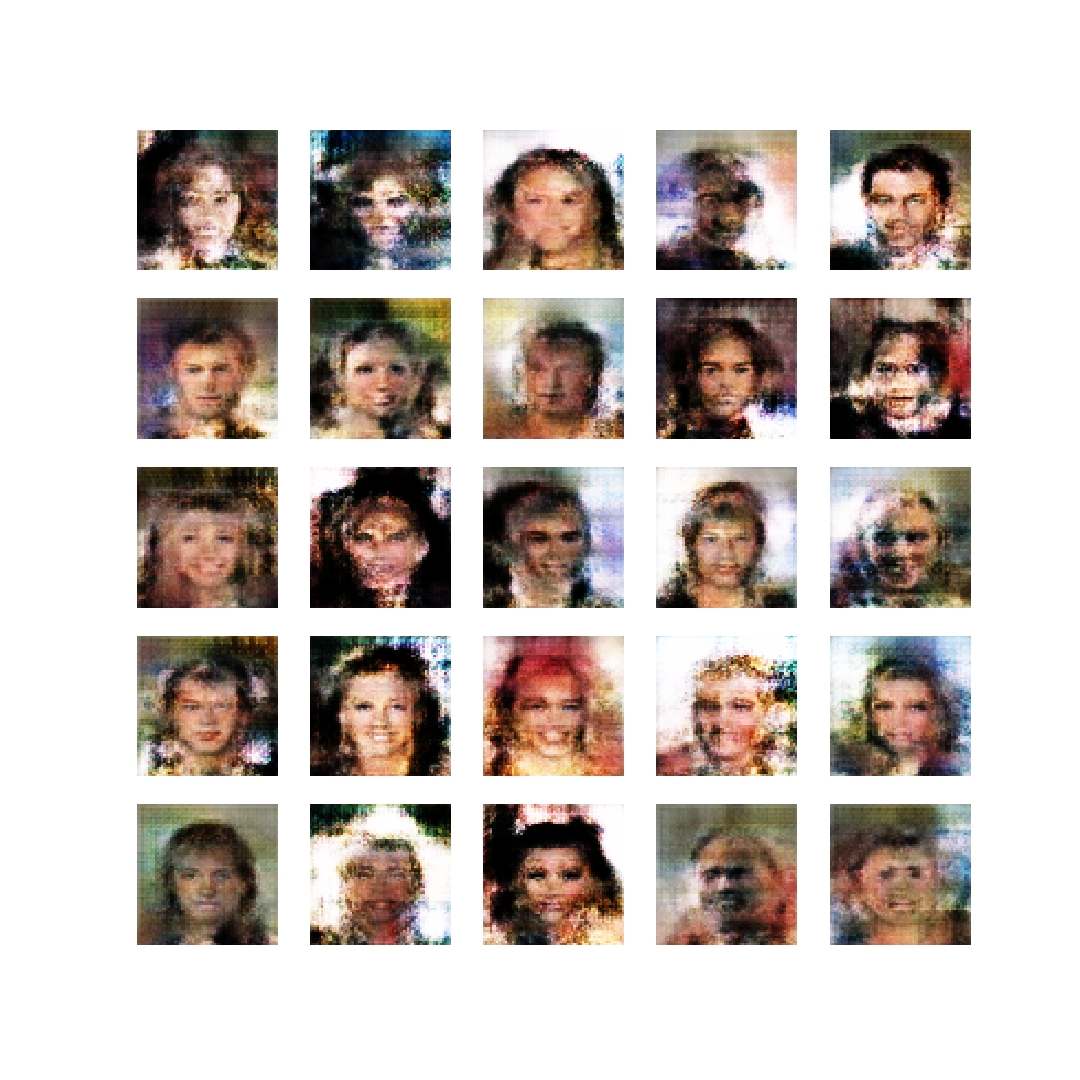

In [19]:
#0005 (после 1000)
Image(filename = RUN_FOLDER + "/images/sample_5.png", width=1080, height=1080)